<a href="https://colab.research.google.com/github/woodwyyn/data-analytics-final/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Этап 1. Импорт библиотек и загрузка данных***

In [94]:
# Импорт библиотек
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Настройки
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style("whitegrid")
sns.set_palette("husl")
pd.options.display.float_format = '{:,.0f}'.format

print("Библиотеки загружены!")

Библиотеки загружены!


In [64]:
# Загрузка данных из CSV файлов
commodities_df = pd.read_csv('commodities.csv')
countries_df = pd.read_csv('countries.csv')
trade_df = pd.read_csv('trade.csv')

print("Данные загружены!")


Данные загружены!


***Этап 2. Первчиный анализ таблиц***

In [65]:
def analyze_dataframe(name, df):
    print(f"\n=== {name.upper()} ===")
    print(f"Размер таблицы: {df.shape}")

    # Типы данных и пропуски
    display(df.info())
    print("\nПропущенные значения:")
    print(df.isnull().sum())

    # Дубликаты
    print(f"\nДубликаты: {df.duplicated().sum()}")

    # Первые строки
    print("\nПервые 5 строк:")
    display(df.head())

    # Доп. анализ для специфичных таблиц
    if name.lower() == 'commodities' and 'sector' in df.columns:
        print("\nРаспределение по секторам экономики:")
        display(df['sector'].value_counts())

    elif name.lower() == 'countries' and 'world_part' in df.columns:
        print("\nРаспределение стран по регионам:")
        display(df['world_part'].value_counts())

    elif name.lower() == 'trade' and 'primaryValue' in df.columns:
        print("\nСтатистика по стоимости операций (primaryValue):")
        print(f"Минимум: {df['primaryValue'].min():,.2f}")
        print(f"Максимум: {df['primaryValue'].max():,.2f}")
        print(f"Среднее: {df['primaryValue'].mean():,.2f}")
        print(f"Медиана: {df['primaryValue'].median():,.2f}")

# Вызов анализа
for name, df in zip(['Commodities', 'Countries', 'Trade'], [commodities_df, countries_df, trade_df]):
    analyze_dataframe(name, df)

print("\n✅ Все таблицы успешно загружены и проанализированы!")



=== COMMODITIES ===
Размер таблицы: (99, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      99 non-null     int64 
 1   text    99 non-null     object
 2   sector  99 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


None


Пропущенные значения:
id        0
text      0
sector    0
dtype: int64

Дубликаты: 0

Первые 5 строк:


,id,text,sector
0,1,Живые животные,Сельское хозяйство и пищевая промышленность
1,2,Мясо и пищевые мясные субпродукты,Сельское хозяйство и пищевая промышленность
2,3,"Рыба и ракообразные, моллюски и прочие водные ...",Сельское хозяйство и пищевая промышленность
3,4,Молочные продукты; яйца птиц; натуральный мёд;...,Сельское хозяйство и пищевая промышленность
4,5,"Продукты животного происхождения, не поименова...",Сельское хозяйство и пищевая промышленность



Распределение по секторам экономики:


,count
sector,
Сельское хозяйство и пищевая промышленность,24
Текстильная и швейная промышленность,17
Металлургия и металлообработка,12
Химическая промышленность,11
Кожевенная и деревообрабатывающая промышленность,6
Машиностроение и электроника,6
Минеральные материалы и изделия из них,4
Приборостроение и высокие технологии,3
Целлюлозно-бумажная промышленность,3



=== COUNTRIES ===
Размер таблицы: (256, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     256 non-null    object
 1   text                   256 non-null    object
 2   reporterCodeIsoAlpha3  256 non-null    object
 3   world_part             256 non-null    object
dtypes: object(4)
memory usage: 8.1+ KB


None


Пропущенные значения:
id                       0
text                     0
reporterCodeIsoAlpha3    0
world_part               0
dtype: int64

Дубликаты: 0

Первые 5 строк:


,id,text,reporterCodeIsoAlpha3,world_part
0,4,Афганистан,AFG,Азия
1,8,Албания,ALB,Европа
2,12,Алжир,DZA,Африка
3,20,Андорра,AND,Европа
4,24,Ангола,AGO,Африка



Распределение стран по регионам:


,count
world_part,
Африка,63
Азия,60
Америка,58
Европа,51
Австралия и Океания,22
Неизвестно,1
world_part,1



=== TRADE ===
Размер таблицы: (521512, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521512 entries, 0 to 521511
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   period        521512 non-null  int64  
 1   reporterCode  521512 non-null  int64  
 2   flowCode      521512 non-null  object 
 3   partnerCode   521512 non-null  int64  
 4   cmdCode       521512 non-null  int64  
 5   primaryValue  521512 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 23.9+ MB


None


Пропущенные значения:
period          0
reporterCode    0
flowCode        0
partnerCode     0
cmdCode         0
primaryValue    0
dtype: int64

Дубликаты: 0

Первые 5 строк:


,period,reporterCode,flowCode,partnerCode,cmdCode,primaryValue
0,2000,124,M,4,3,"16,361"
1,2000,124,M,4,5,28
2,2000,124,M,4,6,62
3,2000,124,M,4,8,"63,620"
4,2000,124,M,4,12,"2,791"



Статистика по стоимости операций (primaryValue):
Минимум: 0.73
Максимум: 163,564,950,572.61
Среднее: 38,791,701.95
Медиана: 68,063.53

✅ Все таблицы успешно загружены и проанализированы!


***Этап 3. Объединение таблиц (Join)***

In [67]:
# Этап 3. Объединение таблиц
def merge_data(trade, commodities, countries):
    print("\n🔄 Объединение trade и commodities...")
    trade = trade.merge(
        commodities,
        left_on='cmdCode',
        right_on='id',
        how='left'
        )

    print("🔄 Объединение с countries...")
    countries['id_numeric'] = pd.to_numeric(countries['id'], errors='coerce')
    merged = trade.merge(
        countries,
        left_on='partnerCode',
        right_on='id_numeric',
        how='left'
        )

    merged = merged.rename(columns={
        'id_x': 'commodity_id',
        'text_x': 'commodity_name',
        'sector': 'economic_sector',
        'id_y': 'country_id',
        'text_y': 'partner_name'
    })

    print(f"✅ Объединено записей: {merged.shape[0]}")
    return merged

full_trade_data = merge_data(trade_df, commodities_df, countries_df)


# Этап 4. Очистка
print("\n🧹 Очистка данных...")
initial_count = len(full_trade_data)
full_trade_data = full_trade_data[full_trade_data['commodity_id'] != 99]
cleaned_count = len(full_trade_data)
print(f"Удалено {initial_count - cleaned_count} записей с невалидными товарами.")


🔄 Объединение trade и commodities...
🔄 Объединение с countries...
✅ Объединено записей: 521512

🧹 Очистка данных...
Удалено 8221 записей с невалидными товарами.


***Анализ внешней торговли Канады***

***1. Как изменялись объёмы торговли по годам?***

*   a) Какие года представлены в базе данных?



*   b) Какова динамика экспорта и импорта по годам?
*   c) Каково годовое торговое сальдо (экспорт минус импорт)?


In [71]:
from pprint import pprint

def get_unique_years(data):
    years = sorted(data['period'].dropna().unique())
    print("Годы, представленные в базе данных:")
    pprint(", ".join(map(str, map(int, years))))
    print(f"\nВременной диапазон: {years[0]} - {years[-1]}")
    print(f"Общее количество лет: {len(years)}")
    return years

def prepare_annual_trade(data):
    df = (
        data
        .groupby(['period', 'flowCode'])['primaryValue']
        .sum()
        .unstack(fill_value=0)
        .rename(columns={'X': 'Экспорт', 'M': 'Импорт'})
    )
    df.round(2)

    df['Сальдо'] = df['Экспорт'] - df['Импорт']
    df['Оборот'] = df['Экспорт'] + df['Импорт']

    print("Годовая динамика внешней торговли (в долларах США):")

    display(df)

    return df

# === 2. ВИЗУАЛИЗАЦИИ ===

def plot_main_graphs(df):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # График 1: Экспорт и импорт
    axes[0, 0].plot(df.index, df['Экспорт'], 'o-', linewidth=3, label='Экспорт')
    axes[0, 0].plot(df.index, df['Импорт'], 's--', linewidth=3, label='Импорт')
    axes[0, 0].set_title('Экспорт и импорт по годам')
    axes[0, 0].legend(); axes[0, 0].grid(alpha=0.3)

    # График 2: Торговое сальдо
    saldo_colors = ['green' if x > 0 else 'red' for x in df['Сальдо']]
    axes[0, 1].bar(df.index, df['Сальдо'], color=saldo_colors, edgecolor='black')
    axes[0, 1].axhline(0, linestyle='--', color='gray')
    axes[0, 1].set_title('Торговое сальдо')
    axes[0, 1].grid(alpha=0.3)

    # График 3: Товарооборот
    axes[1, 0].fill_between(df.index, df['Оборот'], color='mediumpurple', alpha=0.3)
    axes[1, 0].plot(df.index, df['Оборот'], '^-', color='purple')
    axes[1, 0].set_title('Общий товарооборот')
    axes[1, 0].grid(alpha=0.3)

    # График 4: Соотношение экспорт/импорт
    ratio = df['Экспорт'] / df['Импорт'].replace(0, float('nan'))
    axes[1, 1].plot(df.index, ratio, 'D-', color='orange')
    axes[1, 1].axhline(1, linestyle='--', color='red', alpha=0.7, label='Паритет')
    axes[1, 1].set_title('Коэффициент экспорт/импорт')
    axes[1, 1].legend(); axes[1, 1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

def plot_growth_rates(df):
    fig, ax = plt.subplots(figsize=(12, 6))
    export_growth = df['Экспорт'].pct_change() * 100
    import_growth = df['Импорт'].pct_change() * 100
    years = df.index[1:]

    ax.bar(years - 0.2, export_growth[1:], width=0.4, label='Рост экспорта', color='steelblue')
    ax.bar(years + 0.2, import_growth[1:], width=0.4, label='Рост импорта', color='tomato')
    ax.axhline(0, color='black', linestyle='--', alpha=0.5)
    ax.set_title('Темпы роста экспорта и импорта')
    ax.legend(); ax.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_moving_average(df, window=3):
    fig, ax = plt.subplots(figsize=(12, 5))
    df['Экспорт'].rolling(window).mean().plot(label='Экспорт (MA)', linewidth=3, linestyle='-')
    df['Импорт'].rolling(window).mean().plot(label='Импорт (MA)', linewidth=3, linestyle='--')
    ax.set_title(f'Скользящее среднее (за {window} года)')
    ax.legend(); ax.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_cumulative(df):
    fig, ax = plt.subplots(figsize=(12, 5))
    df['Экспорт'].cumsum().plot(label='Кумулятивный экспорт', color='blue')
    df['Импорт'].cumsum().plot(label='Кумулятивный импорт', color='red')
    ax.set_title('Кумулятивные объёмы торговли')
    ax.legend(); ax.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# === 3. СТАТИСТИКА ===

def print_statistics(df):
    print("\n=== КЛЮЧЕВЫЕ ПОКАЗАТЕЛИ ===")
    print(f"Средний экспорт: {df['Экспорт'].mean():,.0f} USD")
    print(f"Средний импорт: {df['Импорт'].mean():,.0f} USD")
    print(f"Среднее сальдо: {df['Сальдо'].mean():,.0f} USD")
    print(f"Макс. товарооборот: {df['Оборот'].max():,.0f} USD в {df['Оборот'].idxmax()} году")

    print("\nТОП-5 лет по положительному сальдо:")
    pprint(df['Сальдо'].sort_values(ascending=False).head(5))

    print("\nТОП-5 лет по отрицательному сальдо:")
    pprint(df['Сальдо'].sort_values().head(5))

a) Какие года представлены в базе данных?
Годы, представленные в базе данных:
('2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, '
 '2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024')

Временной диапазон: 2000 - 2024
Общее количество лет: 25

b) Какова динамика экспорта и импорта по годам?
c) Каково годовое торговое сальдо (экспорт минус импорт)?

Годовая динамика внешней торговли (в долларах США):


flowCode,Импорт,Экспорт,Сальдо,Оборот
period,,,,
2000,"235,411,244,737","261,607,675,172","26,196,430,435","497,018,919,909"
2001,"216,832,017,788","245,217,574,539","28,385,556,751","462,049,592,327"
2002,"218,371,968,028","236,489,045,637","18,117,077,609","454,861,013,665"
2003,"236,264,489,605","257,370,724,764","21,106,235,159","493,635,214,369"
2004,"269,415,710,265","301,760,659,327","32,344,949,062","571,176,369,592"
2005,"309,751,695,955","344,329,136,154","34,577,440,199","654,080,832,109"
2006,"344,867,455,545","371,886,140,258","27,018,684,713","716,753,595,803"
2007,"374,040,823,846","403,530,317,204","29,489,493,358","777,571,141,050"
2008,"401,334,086,650","438,909,830,523","37,575,743,873","840,243,917,173"


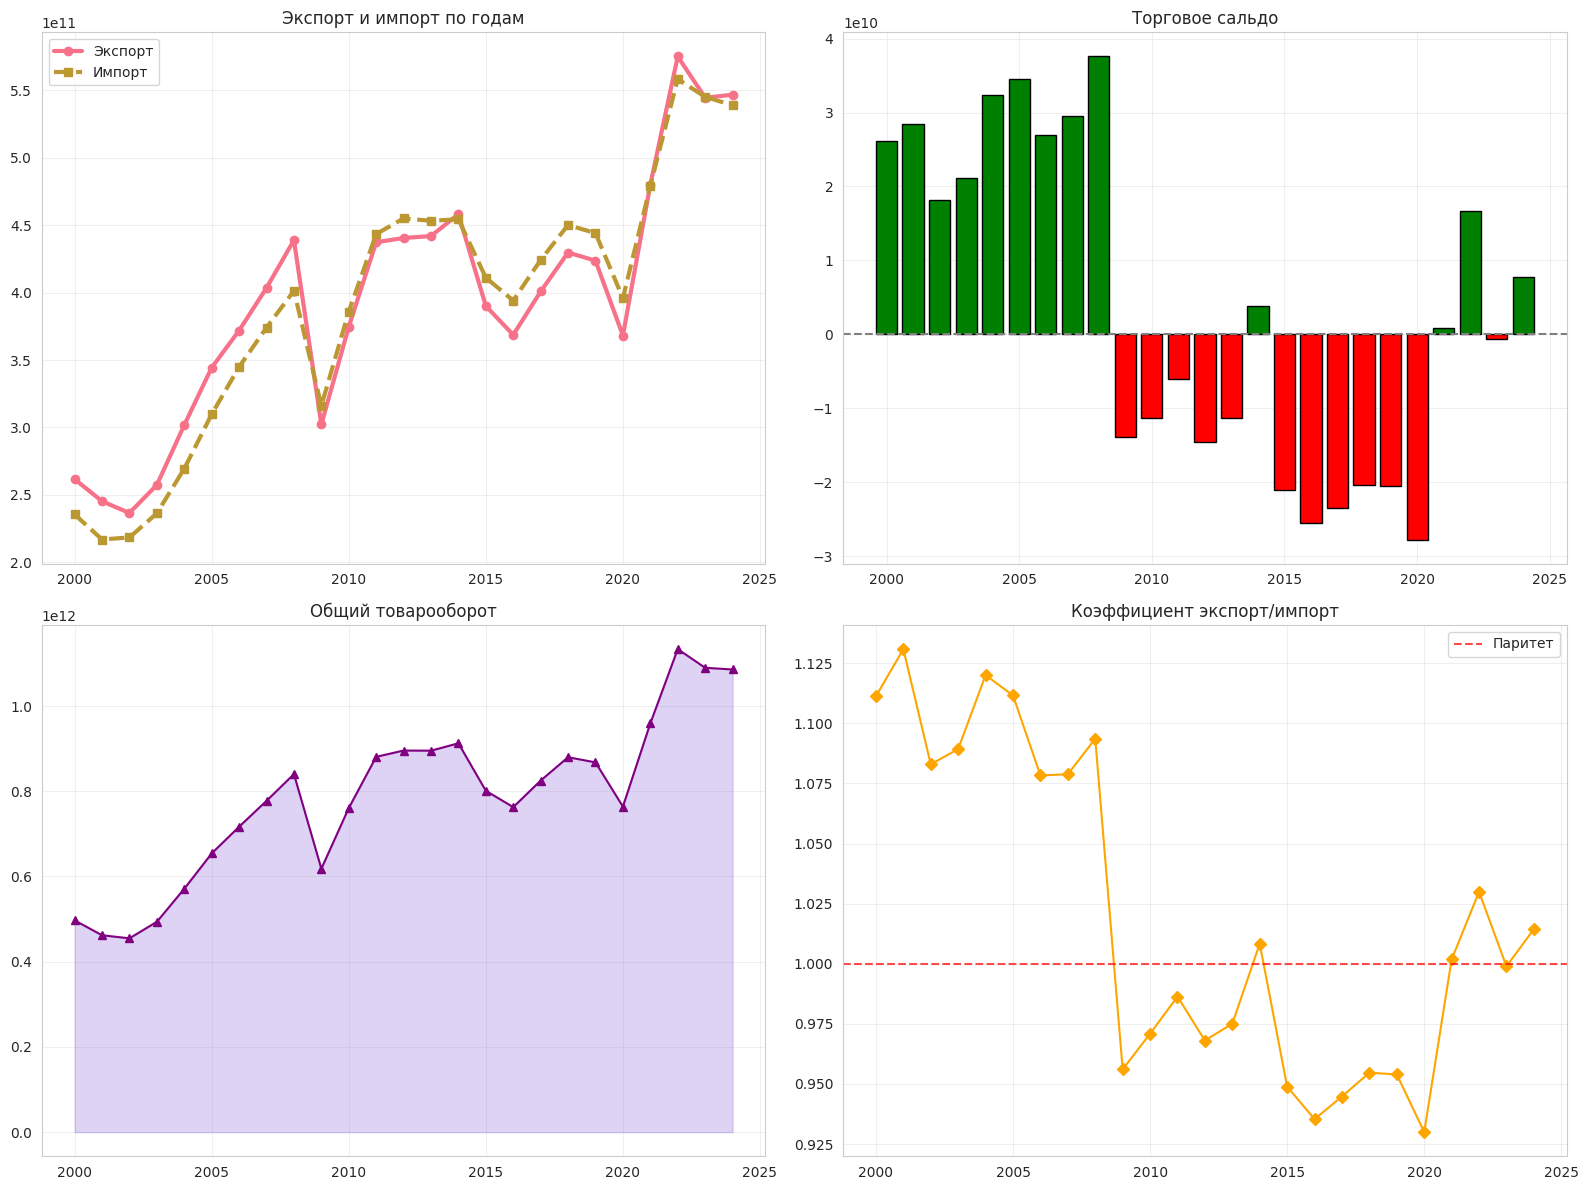

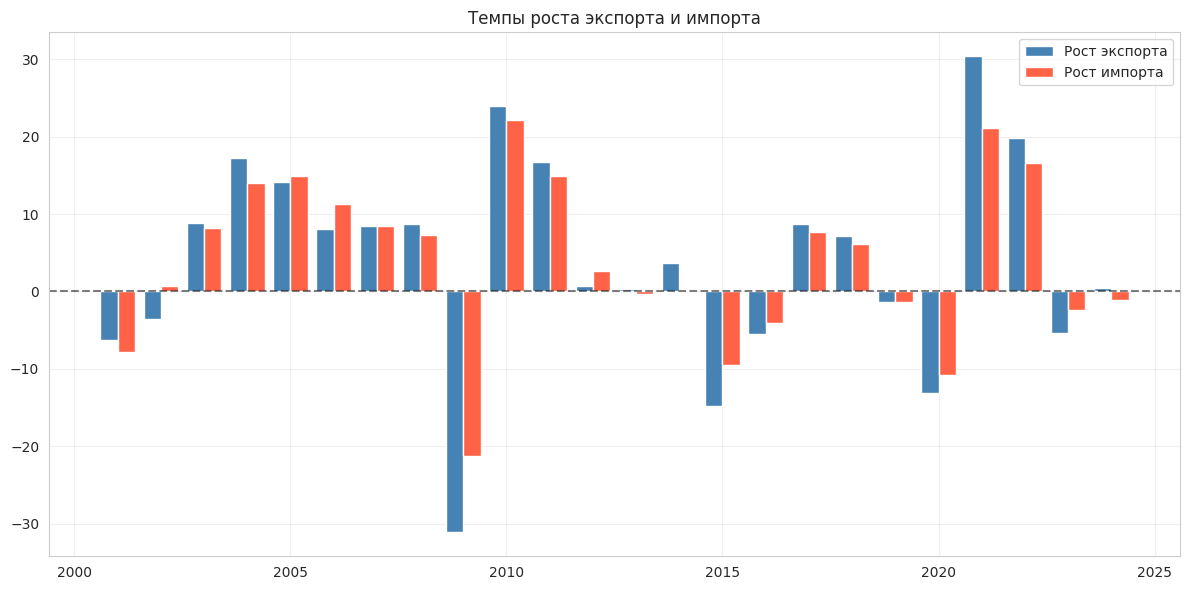

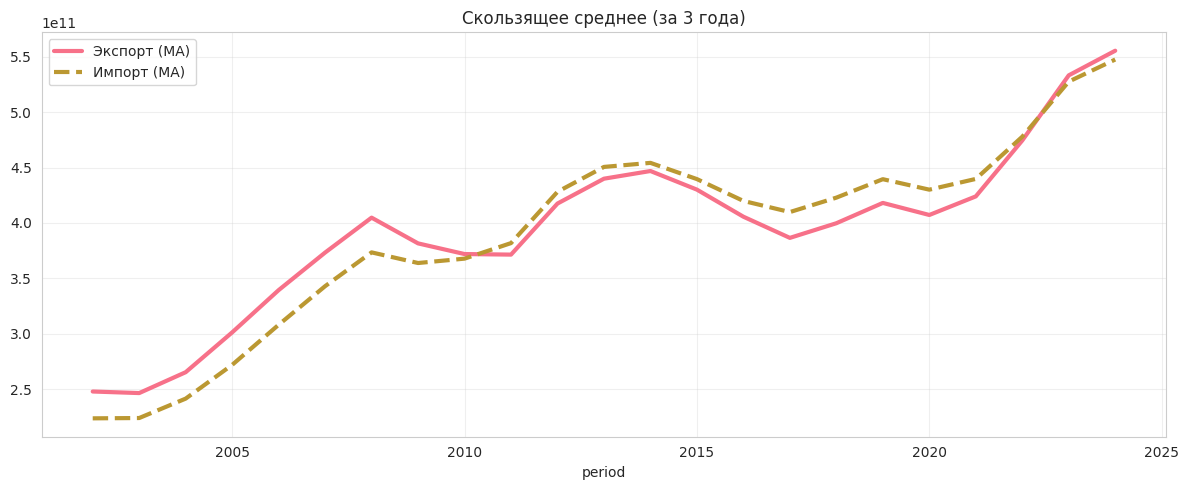

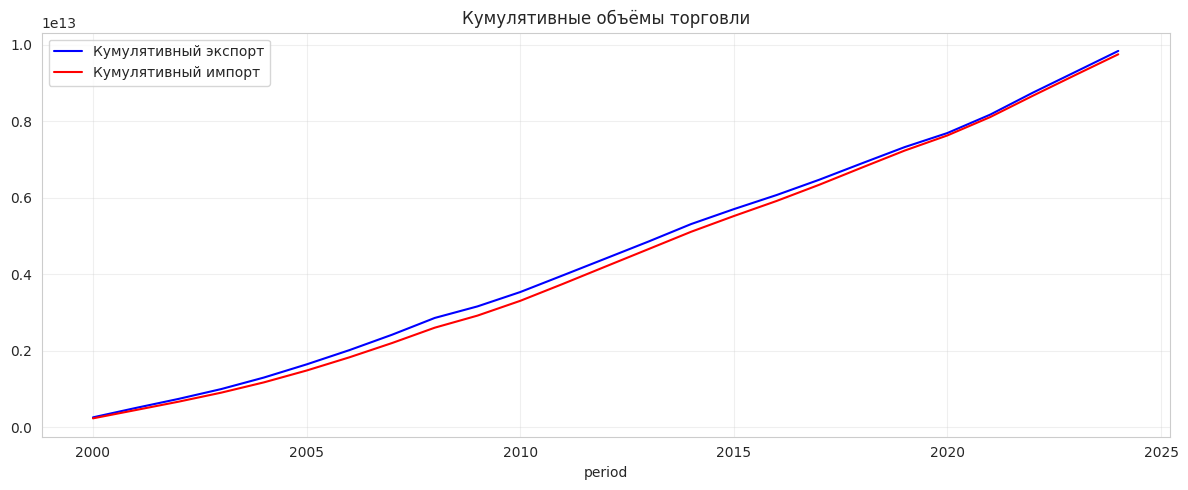


=== КЛЮЧЕВЫЕ ПОКАЗАТЕЛИ ===
Средний экспорт: 393,749,107,102 USD
Средний импорт: 390,238,818,006 USD
Среднее сальдо: 3,510,289,096 USD
Макс. товарооборот: 1,133,657,036,920 USD в 2022 году

ТОП-5 лет по положительному сальдо:
period
2008   37,575,743,873
2005   34,577,440,199
2004   32,344,949,062
2007   29,489,493,358
2001   28,385,556,751
Name: Сальдо, dtype: float64

ТОП-5 лет по отрицательному сальдо:
period
2020   -27,734,188,023
2016   -25,480,569,743
2017   -23,436,400,688
2015   -21,020,104,809
2019   -20,457,845,105
Name: Сальдо, dtype: float64


In [75]:
print('a) Какие года представлены в базе данных?')
unique_years = get_unique_years(full_trade_data)

print('\nb) Какова динамика экспорта и импорта по годам?\nc) Каково годовое торговое сальдо (экспорт минус импорт)?\n')
annual_trade = prepare_annual_trade(full_trade_data)

plot_main_graphs(annual_trade)
plot_growth_rates(annual_trade)
plot_moving_average(annual_trade, window=3)
plot_cumulative(annual_trade)
print_statistics(annual_trade)

***2. Какие группы товаров экспортируются и импортируются в наибольшем объёме?***


*   a) Сформируйте топ-10 товарных групп по экспорту и импорту
*   b) Отметьте группы с наибольшим приростом за последние 3 года.


In [88]:
def get_top_groups(data, flow_code, top_n=10):
    df_flow = data.query("flowCode == @flow_code")
    total_value = df_flow['primaryValue'].sum()
    top_groups = (
        df_flow.groupby('commodity_name')['primaryValue']
        .sum()
        .nlargest(top_n)
        .reset_index()
        .rename(columns={'commodity_name': 'Товар', 'primaryValue': f'Сумма {"экспорта" if flow_code=="X" else "импорта"} ($)'})
    )
    top_groups[f'Доля {"экспорта" if flow_code=="X" else "импорта"} (%)'] = (top_groups.iloc[:,1] / total_value * 100).round(2)

    print(f"Топ-{top_n} товарных групп по {'экспорту' if flow_code=='X' else 'импорту'}:")
    display(top_groups)

    return top_groups, total_value

def calculate_growth(data, flow_code, years_to_check, min_volume=1_000_000, top_n=10):
    df_filtered = data.query("flowCode == @flow_code and period in @years_to_check")
    if df_filtered.empty:
        print(f"Нет данных для направления {flow_code} за {years_to_check}.")
        return None
    by_group_year = df_filtered.pivot_table(
        index='commodity_name',
        columns='period',
        values='primaryValue',
        aggfunc='sum',
        fill_value=0
    )
    by_group_year.columns = by_group_year.columns.astype(int)
    start_year, end_year = years_to_check[0], years_to_check[-1]
    if start_year not in by_group_year.columns or end_year not in by_group_year.columns:
        print(f"Недостаточно данных для анализа роста: отсутствуют значения за {start_year} или {end_year}.")
        return None

    growth_df = pd.DataFrame({
        f'Объем {start_year}': by_group_year[start_year],
        f'Объем {end_year}': by_group_year[end_year]
    })
    growth_df['Абсолютный прирост ($)'] = growth_df[f'Объем {end_year}'] - growth_df[f'Объем {start_year}']
    growth_df['Рост (%)'] = ((growth_df['Абсолютный прирост ($)'] / growth_df[f'Объем {start_year}'].replace(0, 1)) * 100).round(2)
    growth_df = growth_df[growth_df[f'Объем {end_year}'] > min_volume]
    growth_df = growth_df.sort_values('Абсолютный прирост ($)', ascending=False).head(top_n)

    flow_text = 'экспорта' if flow_code == 'X' else 'импорта' if flow_code == 'M' else flow_code

    print(f"Прирост товарных групп для направления {flow_text} за {start_year}-{end_year}:")
    display(growth_df)

    return growth_df

def plot_top_groups(top_export, top_import, export_growth, import_growth, start_year, end_year):
    fig, axes = plt.subplots(4, 2, figsize=(16, 20))

    # Топ-10 экспорт
    axes[0, 0].barh(range(len(top_export)), top_export.iloc[:,1], color='green', alpha=0.7)
    axes[0, 0].set_yticks(range(len(top_export)))
    axes[0, 0].set_yticklabels([name if len(name) <= 25 else name[:25]+'...' for name in top_export['Товар']], fontsize=9)
    axes[0, 0].set_title('Топ-10 товарных групп по экспорту', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Объем экспорта (доллары)')
    axes[0, 0].invert_yaxis()

    # Топ-10 импорт
    axes[0, 1].barh(range(len(top_import)), top_import.iloc[:,1], color='blue', alpha=0.7)
    axes[0, 1].set_yticks(range(len(top_import)))
    axes[0, 1].set_yticklabels([name if len(name) <= 25 else name[:25]+'...' for name in top_import['Товар']], fontsize=9)
    axes[0, 1].set_title('Топ-10 товарных групп по импорту', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Объем импорта (доллары)')
    axes[0, 1].invert_yaxis()

    # Круговые диаграммы экспорта и импорта
    def pie_plot(ax, data, title):
        shares = data.iloc[:, -1]
        other = 100 - shares.sum()
        top5 = shares[:5]
        top6_10 = shares[5:].sum()
        pie_data = list(top5) + [top6_10, other]
        pie_labels = list(data['Товар'][:5]) + ['Топ 6–10', 'Остальные']
        ax.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize':8})
        ax.set_title(title, fontsize=12, fontweight='bold')

    pie_plot(axes[1, 0], top_export, 'Структура экспорта по товарным группам')
    pie_plot(axes[1, 1], top_import, 'Структура импорта по товарным группам')

    # Приросты (абсолютный)
    if export_growth is not None:
        axes[2, 0].barh(range(len(export_growth)), export_growth['Абсолютный прирост ($)'], color='orange', alpha=0.7)
        axes[2, 0].set_yticks(range(len(export_growth)))
        axes[2, 0].set_yticklabels([name if len(name) <= 20 else name[:20]+'...' for name in export_growth.index], fontsize=9)
        axes[2, 0].set_title(f'Прирост экспорта ({start_year}–{end_year})', fontsize=12, fontweight='bold')
        axes[2, 0].set_xlabel('Прирост (доллары)')
        axes[2, 0].invert_yaxis()

    if import_growth is not None:
        axes[2, 1].barh(range(len(import_growth)), import_growth['Абсолютный прирост ($)'], color='purple', alpha=0.7)
        axes[2, 1].set_yticks(range(len(import_growth)))
        axes[2, 1].set_yticklabels([name if len(name) <= 20 else name[:20]+'...' for name in import_growth.index], fontsize=9)
        axes[2, 1].set_title(f'Прирост импорта ({start_year}–{end_year})', fontsize=12, fontweight='bold')
        axes[2, 1].set_xlabel('Прирост (доллары)')
        axes[2, 1].invert_yaxis()

    # Приросты (процентный)
    if export_growth is not None:
        colors_exp = ['green' if x > 0 else 'red' for x in export_growth['Рост (%)']]
        axes[3, 0].barh(range(len(export_growth)), export_growth['Рост (%)'], color=colors_exp, alpha=0.7)
        axes[3, 0].set_yticks(range(len(export_growth)))
        axes[3, 0].set_yticklabels([name if len(name) <= 20 else name[:20]+'...' for name in export_growth.index], fontsize=9)
        axes[3, 0].set_title('Процентный прирост экспорта', fontsize=12, fontweight='bold')
        axes[3, 0].set_xlabel('Рост (%)')
        axes[3, 0].invert_yaxis()
        axes[3, 0].axvline(x=0, color='black', linestyle='-', alpha=0.3)

    if import_growth is not None:
        colors_imp = ['green' if x > 0 else 'red' for x in import_growth['Рост (%)']]
        axes[3, 1].barh(range(len(import_growth)), import_growth['Рост (%)'], color=colors_imp, alpha=0.7)
        axes[3, 1].set_yticks(range(len(import_growth)))
        axes[3, 1].set_yticklabels([name if len(name) <= 20 else name[:20]+'...' for name in import_growth.index], fontsize=9)
        axes[3, 1].set_title('Процентный прирост импорта', fontsize=12, fontweight='bold')
        axes[3, 1].set_xlabel('Рост (%)')
        axes[3, 1].invert_yaxis()
        axes[3, 1].axvline(x=0, color='black', linestyle='-', alpha=0.3)

    plt.tight_layout()
    plt.show()

def print_summary(top_export, top_import, export_growth, import_growth):
    print("\n=== СТАТИСТИКА ПО ТОВАРНЫМ ГРУППАМ ===")
    print(f"Доля топ-10 товаров в экспорте: {top_export.iloc[:, -1].sum():.1f}%")
    print(f"Доля топ-10 товаров в импорте: {top_import.iloc[:, -1].sum():.1f}%")
    if export_growth is not None and len(export_growth) > 0:
        print(f"Наибольший прирост экспорта: {export_growth.index[0]} ({export_growth['Абсолютный прирост ($)'].iloc[0]:,.0f} долларов)")
    if import_growth is not None and len(import_growth) > 0:
        print(f"Наибольший прирост импорта: {import_growth.index[0]} ({import_growth['Абсолютный прирост ($)'].iloc[0]:,.0f} долларов)")

# --- Дополнительный метод: кластеризация товарных групп по объёмам и ростам ---

def cluster_commodity_groups(data, flow_code, years_to_check, n_clusters=4):
    df_filtered = data.query("flowCode == @flow_code and period in @years_to_check")
    by_group_year = df_filtered.pivot_table(
        index='commodity_name',
        columns='period',
        values='primaryValue',
        aggfunc='sum',
        fill_value=0
    )
    by_group_year.columns = by_group_year.columns.astype(int)
    start_year, end_year = years_to_check[0], years_to_check[-1]
    by_group_year = by_group_year[(by_group_year[start_year] > 0) & (by_group_year[end_year] > 0)]

    # Фичи: объемы и приросты
    growth_abs = by_group_year[end_year] - by_group_year[start_year]
    growth_pct = ((growth_abs) / by_group_year[start_year]).replace([np.inf, -np.inf], 0).fillna(0)

    X = pd.DataFrame({
        'start_volume': by_group_year[start_year],
        'end_volume': by_group_year[end_year],
        'growth_abs': growth_abs,
        'growth_pct': growth_pct
    })

    # Кластеризация
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    X['cluster'] = kmeans.fit_predict(X)

    # Возвращаем результаты с кластером
    result = X.copy()
    result.index.name = 'commodity_name'
    return result



Топ-10 товарных групп по экспорту:


,Товар,Сумма экспорта ($),Доля экспорта (%)
0,"Минеральные топлива, масла и продукты их перег...","2,292,943,463,461",23
1,"Наземные транспортные средства, кроме Ж/Д","1,416,001,347,846",14
2,"Ядерные реакторы, котлы, оборудование и механи...","767,758,618,260",8
3,"Драгоценные и полудрагоценные камни, драгоценн...","390,534,230,175",4
4,"Электрические машины и оборудование, аудио- и ...","370,709,585,921",4
5,Древесина и изделия из древесины; древесный уголь,"328,003,086,791",3
6,Пластмассы и изделия из них,"302,543,170,885",3
7,Летательные аппараты и космические устройства,"246,254,447,066",2
8,Бумага и картон; изделия из бумажной массы,"236,828,824,186",2
9,Алюминий и изделия из него,"225,347,516,675",2


Топ-10 товарных групп по импорту:


,Товар,Сумма импорта ($),Доля импорта (%)
0,"Наземные транспортные средства, кроме Ж/Д","1,585,872,367,467",16
1,"Ядерные реакторы, котлы, оборудование и механи...","1,508,237,784,265",15
2,"Электрические машины и оборудование, аудио- и ...","990,346,288,825",10
3,"Минеральные топлива, масла и продукты их перег...","812,900,111,437",8
4,Пластмассы и изделия из них,"352,848,914,406",4
5,Фармацевтическая продукция,"286,059,674,891",3
6,"Оптические, фотографические, измерительные, ме...","285,876,461,391",3
7,"Драгоценные и полудрагоценные камни, драгоценн...","256,598,052,767",3
8,Изделия из чёрных металлов,"229,429,291,124",2
9,Мебель; постельные принадлежности; матрасы и др.,"190,203,475,852",2


Прирост товарных групп для направления экспорта за 2022-2024:


,Объем 2022,Объем 2024,Абсолютный прирост ($),Рост (%)
commodity_name,,,,
"Драгоценные и полудрагоценные камни, драгоценные металлы, монеты","22,422,681,633","33,091,529,408","10,668,847,775",48
"Наземные транспортные средства, кроме Ж/Д","50,226,070,534","57,991,545,986","7,765,475,452",15
"Ядерные реакторы, котлы, оборудование и механические устройства","37,713,417,176","41,006,996,633","3,293,579,458",9
Летательные аппараты и космические устройства,"10,149,181,575","13,211,989,712","3,062,808,137",30
"Электрические машины и оборудование, аудио- и видеотехника","14,742,332,181","17,451,794,032","2,709,461,851",18
Неорганические химические продукты,"5,522,952,059","7,158,532,768","1,635,580,709",30
"Готовые продукты из зерна, муки, крахмала или молока; мучные кондитерские изделия","6,171,438,109","7,212,880,648","1,041,442,539",17
Какао и продукты из него,"2,109,002,604","3,063,214,306","954,211,702",45
Фармацевтическая продукция,"10,733,881,150","11,290,615,100","556,733,949",5


Прирост товарных групп для направления импорта за 2022-2024:


,Объем 2022,Объем 2024,Абсолютный прирост ($),Рост (%)
commodity_name,,,,
"Наземные транспортные средства, кроме Ж/Д","82,522,822,705","90,377,512,429","7,854,689,724",10
"Ядерные реакторы, котлы, оборудование и механические устройства","80,375,133,967","82,659,579,026","2,284,445,058",3
"Оптические, фотографические, измерительные, медицинские и др. приборы","14,496,128,494","15,627,494,314","1,131,365,820",8
Какао и продукты из него,"1,938,485,626","2,958,968,448","1,020,482,822",53
Животные или растительные жиры и масла и их расщеплённые продукты,"1,731,308,770","2,555,625,670","824,316,900",48
Летательные аппараты и космические устройства,"8,004,700,282","8,804,006,662","799,306,380",10
"Эфирные масла и резиноиды; парфюмерная, косметическая и туалетная продукция","4,407,185,579","4,963,982,207","556,796,628",13
Разнообразные пищевые продукты,"3,617,896,460","4,083,480,382","465,583,922",13
"Готовые продукты из зерна, муки, крахмала или молока; мучные кондитерские изделия","4,032,479,280","4,453,960,215","421,480,934",10


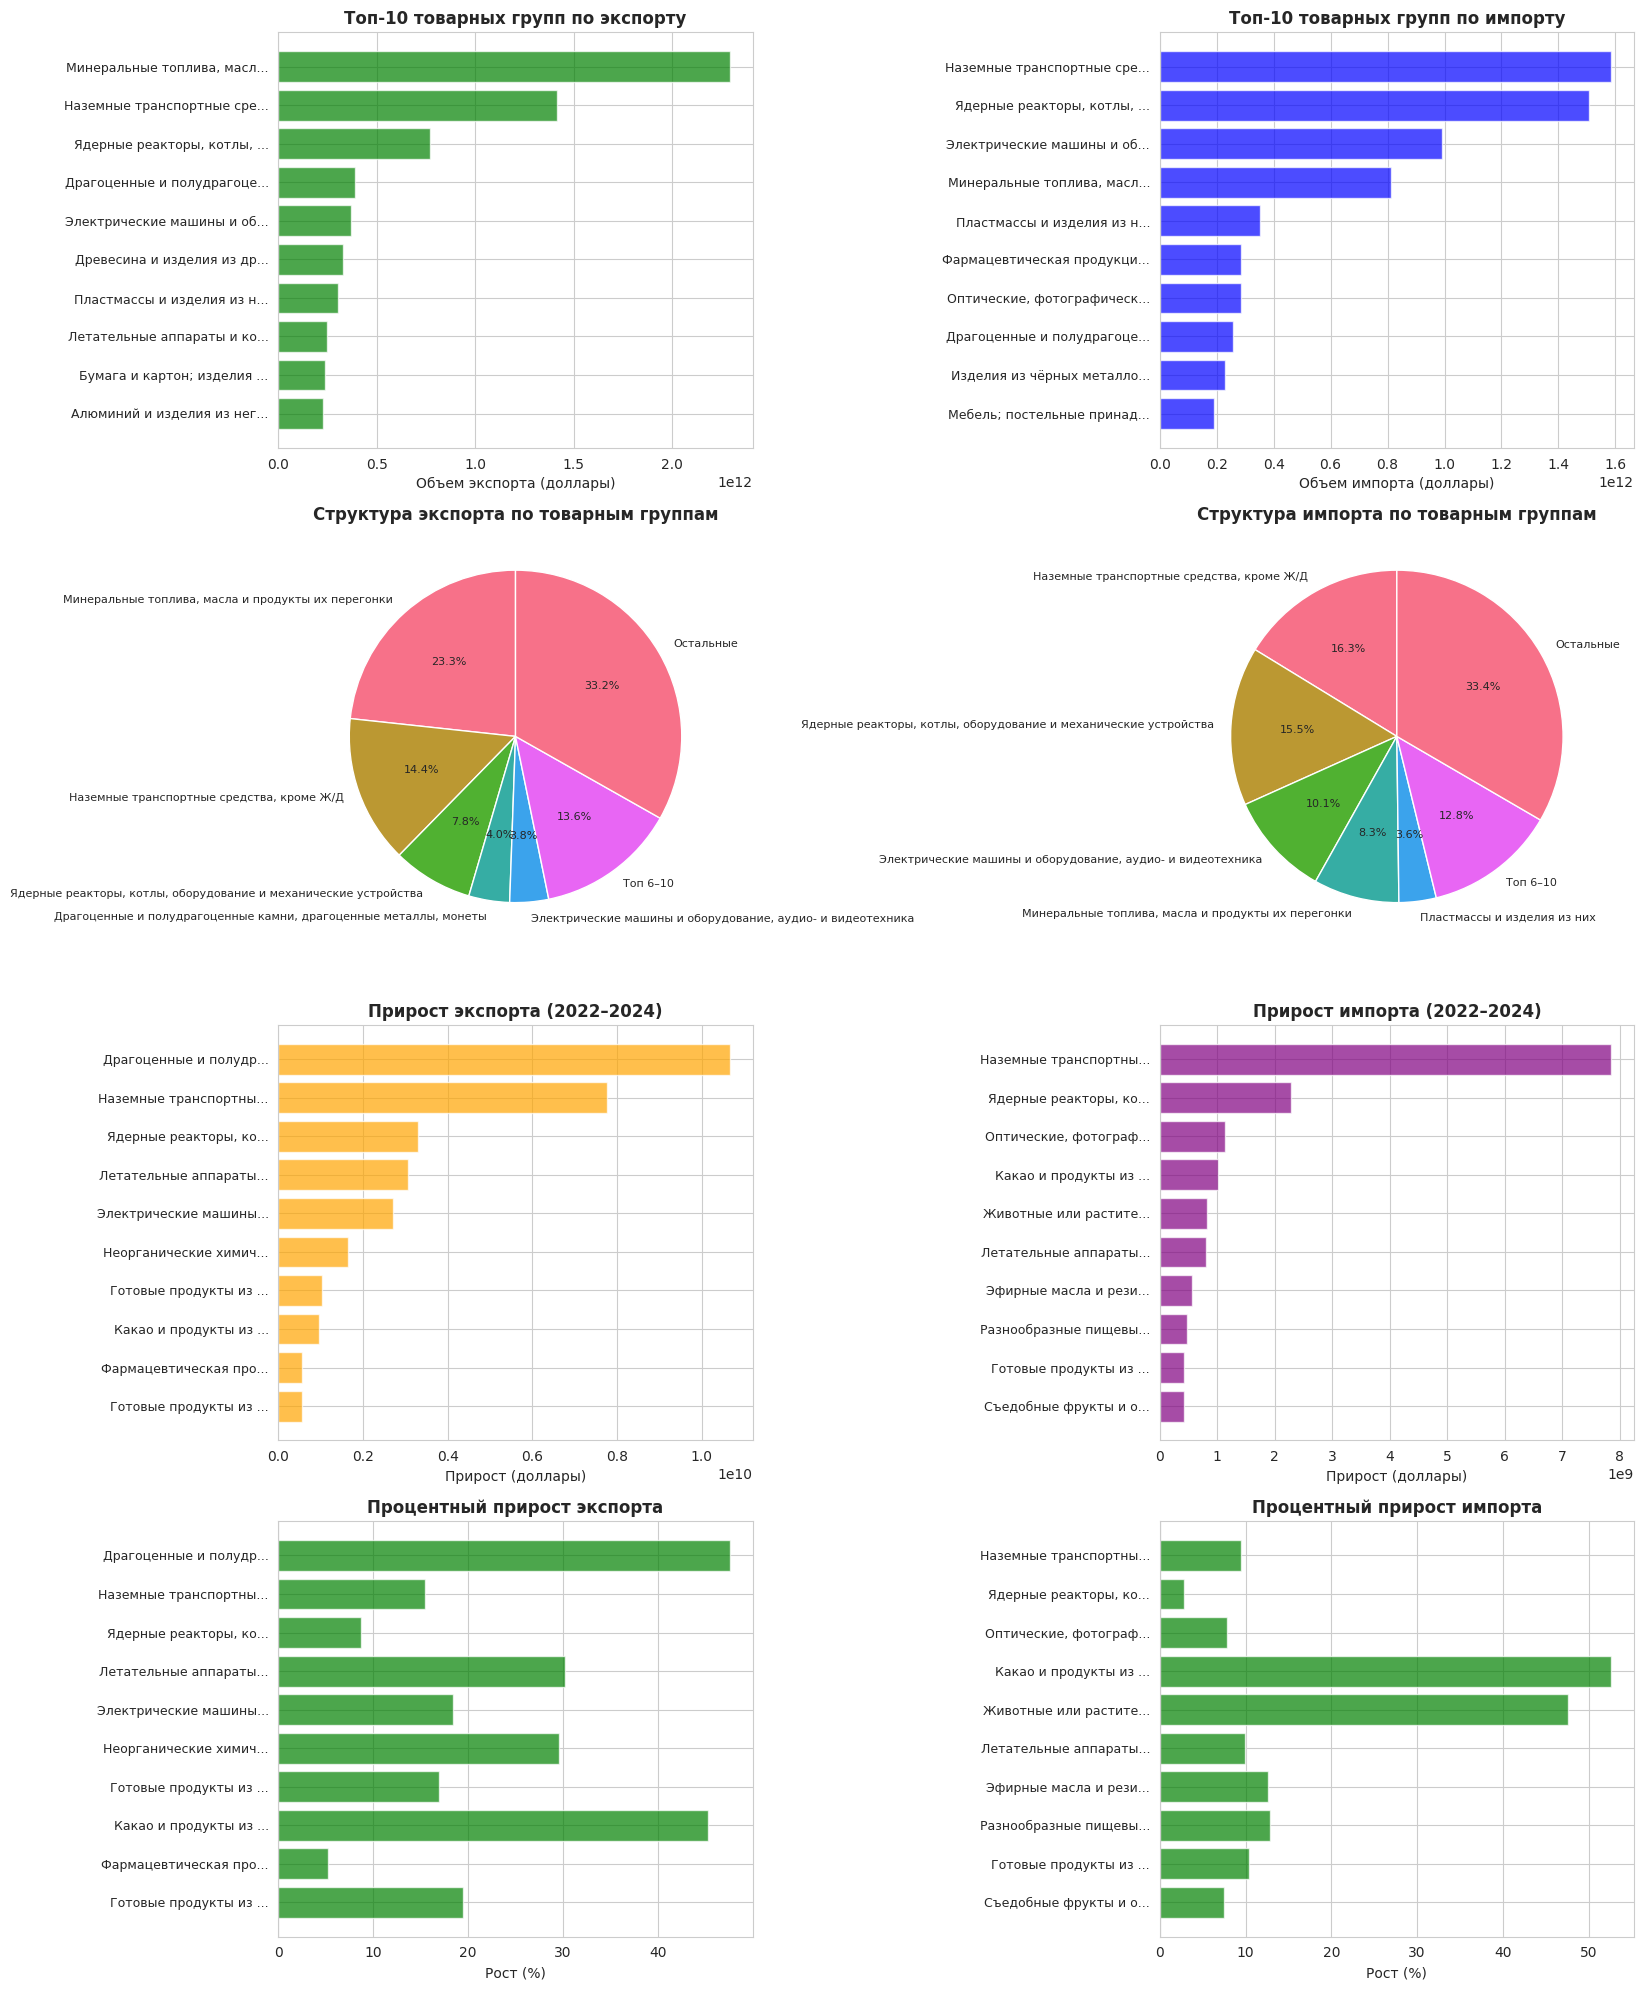


=== СТАТИСТИКА ПО ТОВАРНЫМ ГРУППАМ ===
Доля топ-10 товаров в экспорте: 66.8%
Доля топ-10 товаров в импорте: 66.6%
Наибольший прирост экспорта: Драгоценные и полудрагоценные камни, драгоценные металлы, монеты (10,668,847,775 долларов)
Наибольший прирост импорта: Наземные транспортные средства, кроме Ж/Д (7,854,689,724 долларов)


In [89]:
years_to_check = sorted([int(y) for y in full_trade_data['period'].unique()])[-3:]

top_export_groups, total_export = get_top_groups(full_trade_data, 'X')
top_import_groups, total_import = get_top_groups(full_trade_data, 'M')

export_growth = calculate_growth(full_trade_data, 'X', years_to_check)
import_growth = calculate_growth(full_trade_data, 'M', years_to_check)

plot_top_groups(top_export_groups, top_import_groups, export_growth, import_growth, years_to_check[0], years_to_check[-1])

print(f"\n=== СТАТИСТИКА ПО ТОВАРНЫМ ГРУППАМ ===")
print(f"Доля топ-10 товаров в экспорте: {top_export_groups['Доля экспорта (%)'].sum():.1f}%")
print(f"Доля топ-10 товаров в импорте: {top_import_groups['Доля импорта (%)'].sum():.1f}%")

if export_growth is not None and len(export_growth) > 0:
    print(f"Наибольший прирост экспорта: {export_growth.index[0]} ({export_growth['Абсолютный прирост ($)'].iloc[0]:,.0f} долларов)")
if import_growth is not None and len(import_growth) > 0:
    print(f"Наибольший прирост импорта: {import_growth.index[0]} ({import_growth['Абсолютный прирост ($)'].iloc[0]:,.0f} долларов)")

***3. Какие секторы экономики преобладают в торговле?***



*   a) Определите долю каждого сектора в структуре экспорта и импорта.

In [90]:
import matplotlib.pyplot as plt

def analyze_trade_sectors(data):
    print("=== АНАЛИЗ СЕКТОРНОЙ СТРУКТУРЫ ТОРГОВЛИ ЗА ПОСЛЕДНИЙ ГОД ===")

    most_recent_year = data['period'].max()
    print(f"Рассматриваем данные за год: {most_recent_year}")

    data_last_year = data[data['period'] == most_recent_year]
    print(f"Всего записей за {most_recent_year} год: {len(data_last_year)}")

    def get_sector_stats(flow_code):
        df = data_last_year[data_last_year['flowCode'] == flow_code]
        sums = df.groupby('economic_sector')['primaryValue'].sum().sort_values(ascending=False)
        total = sums.sum()
        percentage = (sums / total * 100).round(2)
        return sums, total, percentage

    export_sums, total_export, export_pct = get_sector_stats('X')
    import_sums, total_import, import_pct = get_sector_stats('M')

    export_df = pd.DataFrame({
        'Сектор': export_sums.index,
        'Объем экспорта ($)': export_sums.values,
        'Доля в экспорте (%)': export_pct.values
    })

    import_df = pd.DataFrame({
        'Сектор': import_sums.index,
        'Объем импорта ($)': import_sums.values,
        'Доля в импорте (%)': import_pct.values
    })

    print(f"\n=== СЕКТОРНАЯ СТРУКТУРА ЭКСПОРТА В {most_recent_year} ГОДУ ===")
    display(export_df)

    print(f"\n=== СЕКТОРНАЯ СТРУКТУРА ИМПОРТА В {most_recent_year} ГОДУ ===")
    display(import_df)

    # Топ-5 секторов для визуализации и сравнения
    top5_export = export_sums.head(5)
    top5_import = import_sums.head(5)

    trade_balance = top5_export - top5_import.reindex(top5_export.index, fill_value=0)
    balance_pct = (trade_balance / (top5_export + top5_import.reindex(top5_export.index, fill_value=0)) * 100).round(2)

    # Визуализация
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))

    axs[0, 0].bar(top5_export.index, top5_export.values, color='forestgreen', alpha=0.75)
    axs[0, 0].set_title(f'Топ-5 экспортных секторов в {most_recent_year} году', fontsize=12, fontweight='bold')
    axs[0, 0].set_ylabel('Объем экспорта ($)')
    axs[0, 0].tick_params(axis='x', rotation=45)
    axs[0, 0].grid(axis='y', linestyle='--', alpha=0.4)

    axs[0, 1].bar(top5_import.index, top5_import.values, color='royalblue', alpha=0.75)
    axs[0, 1].set_title(f'Топ-5 импортных секторов в {most_recent_year} году', fontsize=12, fontweight='bold')
    axs[0, 1].set_ylabel('Объем импорта ($)')
    axs[0, 1].tick_params(axis='x', rotation=45)
    axs[0, 1].grid(axis='y', linestyle='--', alpha=0.4)

    bar_width = 0.35
    indices = range(len(top5_export))
    axs[1, 0].bar([i - bar_width/2 for i in indices], top5_export.values, bar_width, label='Экспорт', color='forestgreen', alpha=0.8)
    axs[1, 0].bar([i + bar_width/2 for i in indices], top5_import.reindex(top5_export.index, fill_value=0).values, bar_width, label='Импорт', color='royalblue', alpha=0.8)
    axs[1, 0].set_title(f'Экспорт vs Импорт по топ-5 секторам ({most_recent_year})', fontsize=12, fontweight='bold')
    axs[1, 0].set_xticks(indices)
    axs[1, 0].set_xticklabels(top5_export.index, rotation=45)
    axs[1, 0].set_ylabel('Объем ($)')
    axs[1, 0].legend()
    axs[1, 0].grid(axis='y', linestyle='--', alpha=0.4)

    colors = ['seagreen' if x >= 0 else 'indianred' for x in trade_balance]
    axs[1, 1].bar(top5_export.index, trade_balance.values, color=colors, alpha=0.7)
    axs[1, 1].axhline(0, color='black', linewidth=0.8, alpha=0.5)
    axs[1, 1].set_title(f'Торговое сальдо по топ-5 секторам ({most_recent_year})', fontsize=12, fontweight='bold')
    axs[1, 1].set_ylabel('Сальдо ($)')
    axs[1, 1].tick_params(axis='x', rotation=45)
    axs[1, 1].grid(axis='y', linestyle='--', alpha=0.4)

    plt.tight_layout()
    plt.show()

    # Итоговая таблица
    comparison_df = pd.DataFrame({
        'Экспорт ($)': top5_export,
        'Импорт ($)': top5_import.reindex(top5_export.index, fill_value=0),
        'Торговое сальдо ($)': trade_balance,
        'Доля сальдо (%)': balance_pct,
        'Доля в экспорте (%)': export_pct[top5_export.index],
        'Доля в импорте (%)': import_pct.reindex(top5_export.index, fill_value=0)
    })

    print(f"\n=== СРАВНИТЕЛЬНЫЙ АНАЛИЗ ТОП-5 СЕКТОРОВ ({most_recent_year}) ===")
    display(comparison_df.round(2))

    # Ключевые выводы
    dominant_export = export_df.iloc[0]
    dominant_import = import_df.iloc[0]

    print(f"\n=== ОСНОВНЫЕ ВЫВОДЫ ПО ТОП-5 СЕКТОРАМ ЗА {most_recent_year} ГОД ===")
    print(f"Лидирующий экспортный сектор: {dominant_export['Сектор']} — {dominant_export['Доля в экспорте (%)']}%, объем: {dominant_export['Объем экспорта ($)']:,.0f} $")
    print(f"Лидирующий импортный сектор: {dominant_import['Сектор']} — {dominant_import['Доля в импорте (%)']}%, объем: {dominant_import['Объем импорта ($)']:,.0f} $")

    print(f"\nКонцентрация в топ-5 секторах:")
    print(f"  Доля топ-5 в экспорте: {export_pct.head(5).sum():.1f}%")
    print(f"  Доля топ-5 в импорте: {import_pct.head(5).sum():.1f}%")

    total_balance = total_export - total_import
    print(f"\nОбщие показатели за {most_recent_year} год:")
    print(f"  Общий экспорт: {total_export:,.0f} $")
    print(f"  Общий импорт: {total_import:,.0f} $")
    print(f"  Торговое сальдо: {total_balance:,.0f} $")

    if total_balance > 0:
        print("Торговое сальдо положительное — профицит.")
    elif total_balance < 0:
        print("Торговое сальдо отрицательное — дефицит.")
    else:
        print("Торговое сальдо сбалансировано.")

=== АНАЛИЗ СЕКТОРНОЙ СТРУКТУРЫ ТОРГОВЛИ ЗА ПОСЛЕДНИЙ ГОД ===
Рассматриваем данные за год: 2024
Всего записей за 2024 год: 21645

=== СЕКТОРНАЯ СТРУКТУРА ЭКСПОРТА В 2024 ГОДУ ===


,Сектор,Объем экспорта ($),Доля в экспорте (%)
0,Топливно-энергетический комплекс,"144,995,461,499",27
1,Машиностроение и электроника,"130,347,859,222",24
2,Сельское хозяйство и пищевая промышленность,"74,196,025,465",14
3,Металлургия и металлообработка,"41,139,093,617",8
4,Химическая промышленность,"38,765,579,305",7
5,Минеральные материалы и изделия из них,"35,240,863,442",6
6,"Пластмассы, резина и изделия из них","19,780,385,555",4
7,Целлюлозно-бумажная промышленность,"14,520,424,937",3
8,Кожевенная и деревообрабатывающая промышленность,"13,998,820,557",3
9,Строительные материалы и сырьё,"13,234,770,775",2



=== СЕКТОРНАЯ СТРУКТУРА ИМПОРТА В 2024 ГОДУ ===


,Сектор,Объем импорта ($),Доля в импорте (%)
0,Машиностроение и электроника,"237,072,625,226",44
1,Химическая промышленность,"54,207,907,537",10
2,Сельское хозяйство и пищевая промышленность,"53,710,451,609",10
3,Металлургия и металлообработка,"36,511,169,201",7
4,Топливно-энергетический комплекс,"34,609,252,455",6
5,"Пластмассы, резина и изделия из них","26,521,997,054",5
6,Минеральные материалы и изделия из них,"24,714,225,671",5
7,Текстильная и швейная промышленность,"18,442,517,452",3
8,Приборостроение и высокие технологии,"16,512,689,679",3
9,Промтовары и мебель,"15,947,238,077",3


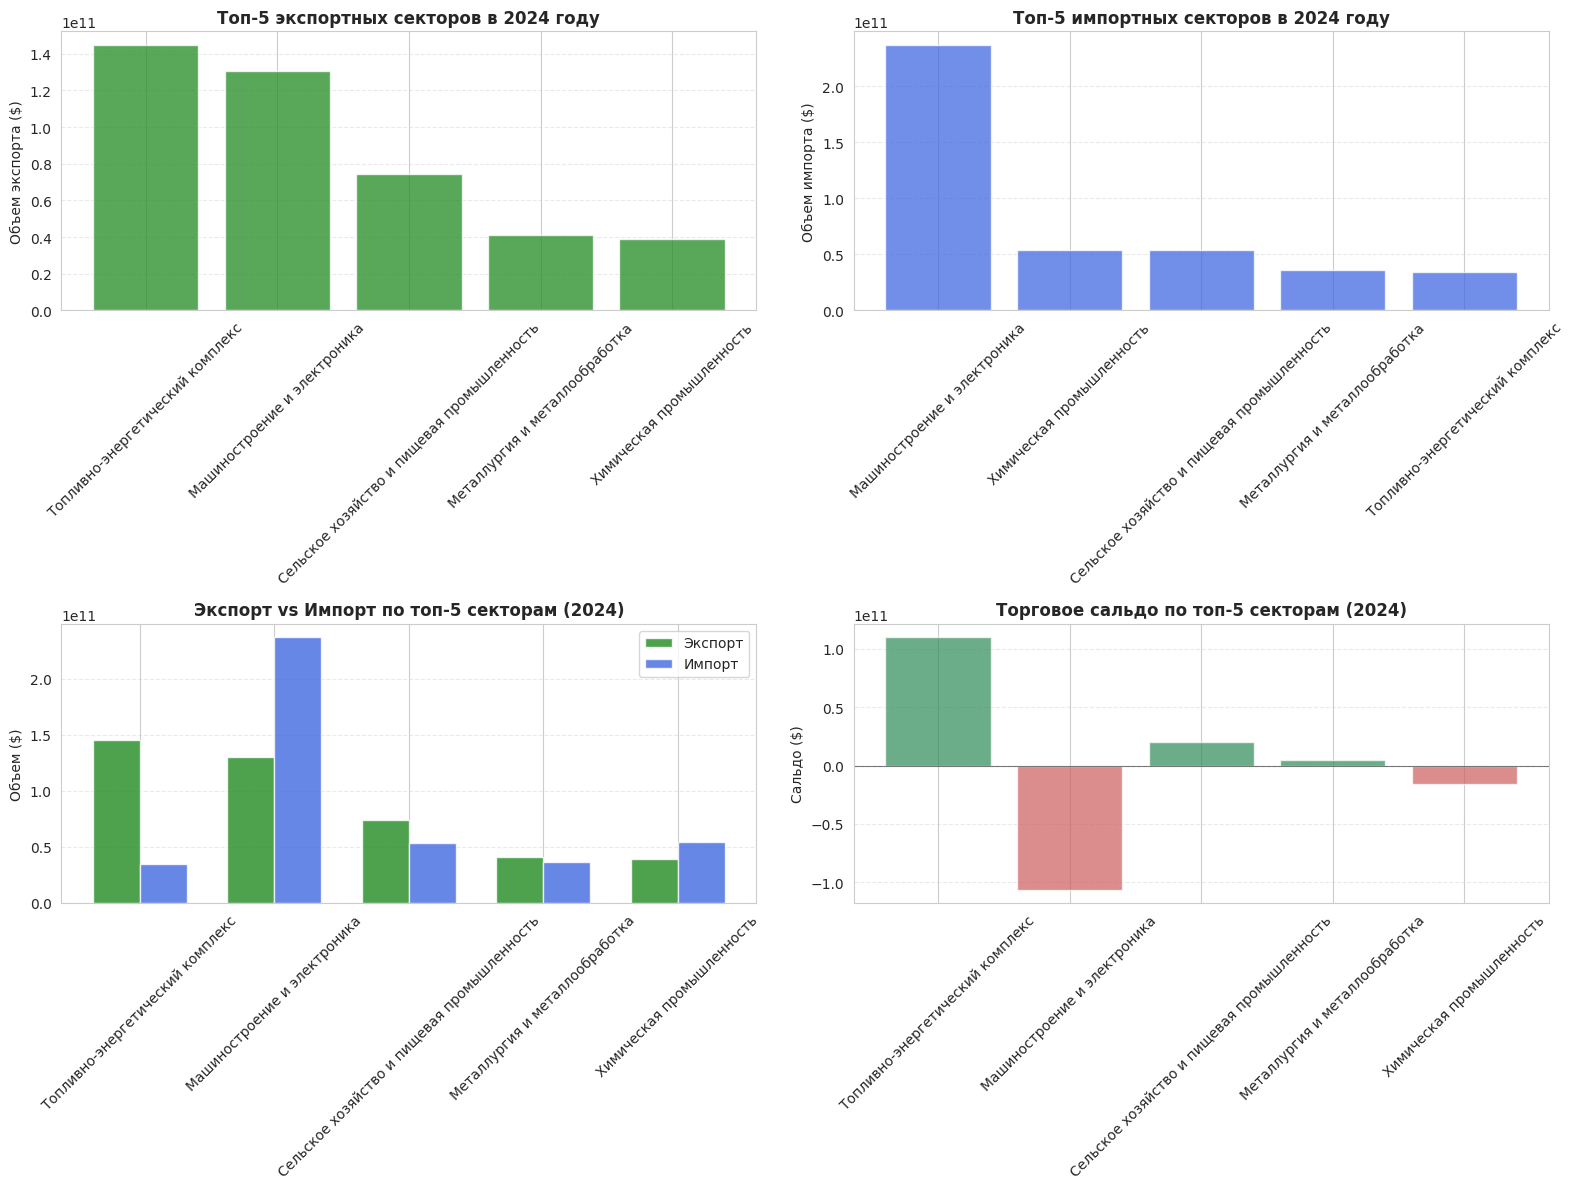


=== СРАВНИТЕЛЬНЫЙ АНАЛИЗ ТОП-5 СЕКТОРОВ (2024) ===


,Экспорт ($),Импорт ($),Торговое сальдо ($),Доля сальдо (%),Доля в экспорте (%),Доля в импорте (%)
economic_sector,,,,,,
Топливно-энергетический комплекс,"144,995,461,499","34,609,252,455","110,386,209,044",61,27,6
Машиностроение и электроника,"130,347,859,222","237,072,625,226","-106,724,766,005",-29,24,44
Сельское хозяйство и пищевая промышленность,"74,196,025,465","53,710,451,609","20,485,573,856",16,14,10
Металлургия и металлообработка,"41,139,093,617","36,511,169,201","4,627,924,416",6,8,7
Химическая промышленность,"38,765,579,305","54,207,907,537","-15,442,328,232",-17,7,10



=== ОСНОВНЫЕ ВЫВОДЫ ПО ТОП-5 СЕКТОРАМ ЗА 2024 ГОД ===
Лидирующий экспортный сектор: Топливно-энергетический комплекс — 26.52%, объем: 144,995,461,499 $
Лидирующий импортный сектор: Машиностроение и электроника — 43.98%, объем: 237,072,625,226 $

Концентрация в топ-5 секторах:
  Доля топ-5 в экспорте: 78.5%
  Доля топ-5 в импорте: 77.2%

Общие показатели за 2024 год:
  Общий экспорт: 546,797,286,380 $
  Общий импорт: 539,031,109,486 $
  Торговое сальдо: 7,766,176,895 $
Торговое сальдо положительное — профицит.


In [91]:
analyze_trade_sectors(full_trade_data)

***4. Какие регионы мира (части света) являются приоритетными в торговле?***




*   a) В целом
*   b) По импорту
*   c) По экспорту


In [105]:
# === Анализ общего товарооборота ===
def analyze_total_trade(full_trade_data):
    total_trade_region = full_trade_data.groupby('world_part')['primaryValue'].sum().sort_values(ascending=False)
    total_trade_sum = total_trade_region.sum()
    trade_percent_region = (total_trade_region / total_trade_sum * 100).round(2)

    overall_trade_df = pd.DataFrame({
        'Регион': total_trade_region.index,
        'Объем торговли (USD)': total_trade_region.values,
        'Доля в общем товарообороте (%)': trade_percent_region.values
    })
    display(overall_trade_df)
    return overall_trade_df, total_trade_sum

# === Анализ экспорта и импорта ===
def analyze_export_import(full_trade_data):
    export_df = full_trade_data[full_trade_data['flowCode'] == 'X']
    import_df = full_trade_data[full_trade_data['flowCode'] == 'M']

    export_region_sum = export_df.groupby('world_part')['primaryValue'].sum().sort_values(ascending=False)
    import_region_sum = import_df.groupby('world_part')['primaryValue'].sum().sort_values(ascending=False)

    export_total = export_region_sum.sum()
    import_total = import_region_sum.sum()

    export_percent = (export_region_sum / export_total * 100).round(2)
    import_percent = (import_region_sum / import_total * 100).round(2)

    export_summary = pd.DataFrame({
        'Регион': export_region_sum.index,
        'Объем экспорта (USD)': export_region_sum.values,
        'Доля в экспорте (%)': export_percent.values
    })

    import_summary = pd.DataFrame({
        'Регион': import_region_sum.index,
        'Объем импорта (USD)': import_region_sum.values,
        'Доля в импорте (%)': import_percent.values
    })

    display(export_summary)
    display(import_summary)

    return export_region_sum, import_region_sum, export_total, import_total, export_summary, import_summary

# === Сравнение регионов ===
def compare_regions(export_region_sum, import_region_sum, export_total, import_total):
    region_comparison = pd.DataFrame({
        'Регион': export_region_sum.index.union(import_region_sum.index)
    }).set_index('Регион')

    region_comparison['Экспорт (USD)'] = export_region_sum
    region_comparison['Импорт (USD)'] = import_region_sum

    region_comparison = region_comparison.fillna(0)
    region_comparison['Общий товарооборот (USD)'] = region_comparison['Экспорт (USD)'] + region_comparison['Импорт (USD)']
    region_comparison['Торговое сальдо (USD)'] = region_comparison['Экспорт (USD)'] - region_comparison['Импорт (USD)']
    region_comparison['Доля в экспорте (%)'] = (region_comparison['Экспорт (USD)'] / export_total * 100).round(2)
    region_comparison['Доля в импорте (%)'] = (region_comparison['Импорт (USD)'] / import_total * 100).round(2)

    region_comparison = region_comparison.sort_values(by='Общий товарооборот (USD)', ascending=False)
    display(region_comparison)

    return region_comparison.reset_index()

# === Обобщение анализа ===
def summarize_analysis(overall_trade_df, export_summary, import_summary, region_comparison, total_trade_sum, export_total, import_total):
    print("\n--- Итоги анализа по регионам ---")
    print(f"Лидирующий регион по общему товарообороту: {overall_trade_df.iloc[0]['Регион']} ({overall_trade_df.iloc[0]['Доля в общем товарообороте (%)']}%)")
    print(f"Ведущий регион по экспорту: {export_summary.iloc[0]['Регион']} ({export_summary.iloc[0]['Доля в экспорте (%)']}%)")
    print(f"Главный регион по импорту: {import_summary.iloc[0]['Регион']} ({import_summary.iloc[0]['Доля в импорте (%)']}%)")

    positive_balance = region_comparison[region_comparison['Торговое сальдо (USD)'] > 0]
    negative_balance = region_comparison[region_comparison['Торговое сальдо (USD)'] < 0]

    print("\nРегионы с положительным торговым сальдо:")
    for _, row in positive_balance.iterrows():
        print(f" - {row['Регион']}: {row['Торговое сальдо (USD)']:,} USD")

    print("\nРегионы с отрицательным торговым сальдо:")
    for _, row in negative_balance.iterrows():
        print(f" - {row['Регион']}: {row['Торговое сальдо (USD)']:,} USD")

    print(f"\nДоля топ-3 регионов в общем товарообороте: {overall_trade_df.head(3)['Доля в общем товарообороте (%)'].sum():.1f}%")
    print(f"Общий объем торговли: {total_trade_sum:,.0f} USD")
    print(f"Объем экспорта: {export_total:,.0f} USD")
    print(f"Объем импорта: {import_total:,.0f} USD")
    print(f"Общее торговое сальдо: {(export_total - import_total):,.0f} USD")

# === Визуализация анализа ===
def visualize_trade(region_comparison):
    fig = px.bar(region_comparison, x='Регион', y='Общий товарооборот (USD)', title='Общий товарооборот по регионам', color='Торговое сальдо (USD)')
    fig.show()

    fig, ax = plt.subplots(figsize=(12, 6))
    colors = region_comparison['Торговое сальдо (USD)'].apply(lambda x: 'green' if x > 0 else 'red')
    ax.bar(region_comparison['Регион'], region_comparison['Торговое сальдо (USD)'] / 1e9, color=colors)
    ax.axhline(0, color='black', linestyle='--')
    ax.set_ylabel('Сальдо (млрд USD)')
    ax.set_title('Торговое сальдо по регионам')
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

# === Динамика торговли по годам ===
def trade_dynamics_by_year(full_trade_data):
    trade_agg = (full_trade_data.groupby(['period', 'world_part', 'flowCode'], as_index=False)
                 .agg({'primaryValue': 'sum'}))
    trade_agg['flowCode'] = trade_agg['flowCode'].replace({'X': 'Экспорт', 'M': 'Импорт'})

    regions_list = trade_agg['world_part'].unique()
    rows, cols = int(np.ceil(len(regions_list)/2)), 2
    fig, axs = plt.subplots(rows, cols, figsize=(16, 5 * rows))
    axs = axs.flatten()

    for i, region in enumerate(regions_list):
        region_data = trade_agg[trade_agg['world_part'] == region]
        for flow_type in ['Экспорт', 'Импорт']:
            subset = region_data[region_data['flowCode'] == flow_type]
            axs[i].plot(subset['period'], subset['primaryValue'], marker='o', label=flow_type)
        axs[i].set_title(f'Торговля в регионе: {region}')
        axs[i].legend()
        axs[i].grid(alpha=0.3)
        axs[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    plt.tight_layout()
    plt.show()

    return trade_agg

# === Анализ CAGR ===
def analyze_cagr(trade_agg):
    pivot_exp = trade_agg[trade_agg['flowCode'] == 'Экспорт'].pivot(index='world_part', columns='period', values='primaryValue').fillna(0)
    pivot_imp = trade_agg[trade_agg['flowCode'] == 'Импорт'].pivot(index='world_part', columns='period', values='primaryValue').fillna(0)

    def calc_cagr(start, end, n):
        if start <= 0 or n == 0:
            return 0
        return (end/start)**(1/n) - 1

    if pivot_exp.shape[1] > 1:
        start_year, end_year = pivot_exp.columns.min(), pivot_exp.columns.max()
        period_count = end_year - start_year

        regions_list = trade_agg['world_part'].unique()
        cagr_df = pd.DataFrame(index=regions_list)
        cagr_df['CAGR Экспорт (%)'] = [calc_cagr(pivot_exp.loc[r, start_year], pivot_exp.loc[r, end_year], period_count)*100 for r in regions_list]
        cagr_df['CAGR Импорт (%)'] = [calc_cagr(pivot_imp.loc[r, start_year], pivot_imp.loc[r, end_year], period_count)*100 for r in regions_list]
        cagr_df = cagr_df.round(2)

        display(cagr_df)

        fig, ax = plt.subplots(figsize=(12, 6))
        indices = np.arange(len(regions_list))
        width = 0.35

        ax.bar(indices - width/2, cagr_df['CAGR Экспорт (%)'], width, label='Экспорт', color='seagreen')
        ax.bar(indices + width/2, cagr_df['CAGR Импорт (%)'], width, label='Импорт', color='steelblue')
        ax.axhline(0, color='grey', linestyle='--')
        ax.set_xticks(indices)
        ax.set_xticklabels(regions_list, rotation=45, ha='right')
        ax.set_title('CAGR торговли по регионам')
        ax.legend()
        plt.tight_layout()
        plt.show()

        print("\nТоп-3 регионов по росту экспорта:")
        print(cagr_df['CAGR Экспорт (%)'].sort_values(ascending=False).head(3))

        print("\nТоп-3 регионов по росту импорта:")
        print(cagr_df['CAGR Импорт (%)'].sort_values(ascending=False).head(3))
    else:
        print("Недостаточно данных для анализа CAGR")

### Анализ распределения торговли по регионам мира ###


,Регион,Объем торговли (USD),Доля в общем товарообороте (%)
0,Америка,"13,844,928,613,054",71
1,Азия,"3,237,643,381,649",17
2,Европа,"2,178,582,603,692",11
3,Африка,"234,136,208,275",1
4,Австралия и Океания,"100,374,280,550",1



Экспорт по регионам:


,Регион,Объем экспорта (USD),Доля в экспорте (%)
0,Америка,"7,863,303,047,715",80
1,Азия,"1,025,338,013,993",10
2,Европа,"831,965,153,678",8
3,Африка,"74,773,385,859",1
4,Австралия и Океания,"47,810,020,338",0


,Регион,Объем импорта (USD),Доля в импорте (%)
0,Америка,"5,981,625,565,339",61
1,Азия,"2,212,305,367,656",23
2,Европа,"1,346,617,450,014",14
3,Африка,"159,362,822,416",2
4,Австралия и Океания,"52,564,260,212",1



Сравнительный анализ торговли по регионам:


,Экспорт (USD),Импорт (USD),Общий товарооборот (USD),Торговое сальдо (USD),Доля в экспорте (%),Доля в импорте (%)
Регион,,,,,,
Америка,"7,863,303,047,715","5,981,625,565,339","13,844,928,613,054","1,881,677,482,376",80,61
Азия,"1,025,338,013,993","2,212,305,367,656","3,237,643,381,649","-1,186,967,353,663",10,23
Европа,"831,965,153,678","1,346,617,450,014","2,178,582,603,692","-514,652,296,336",8,14
Африка,"74,773,385,859","159,362,822,416","234,136,208,275","-84,589,436,557",1,2
Австралия и Океания,"47,810,020,338","52,564,260,212","100,374,280,550","-4,754,239,873",0,1



--- Итоги анализа по регионам ---
Лидирующий регион по общему товарообороту: Америка (70.65%)
Ведущий регион по экспорту: Америка (79.89%)
Главный регион по импорту: Америка (61.33%)

Регионы с положительным торговым сальдо:
 - Америка: 1,881,677,482,375.6367 USD

Регионы с отрицательным торговым сальдо:
 - Азия: -1,186,967,353,663.162 USD
 - Европа: -514,652,296,335.5039 USD
 - Африка: -84,589,436,557.276 USD
 - Австралия и Океания: -4,754,239,873.318001 USD

Доля топ-3 регионов в общем товарообороте: 98.3%
Общий объем торговли: 19,595,665,087,220 USD
Объем экспорта: 9,843,189,621,583 USD
Объем импорта: 9,752,475,465,637 USD
Общее торговое сальдо: 90,714,155,946 USD


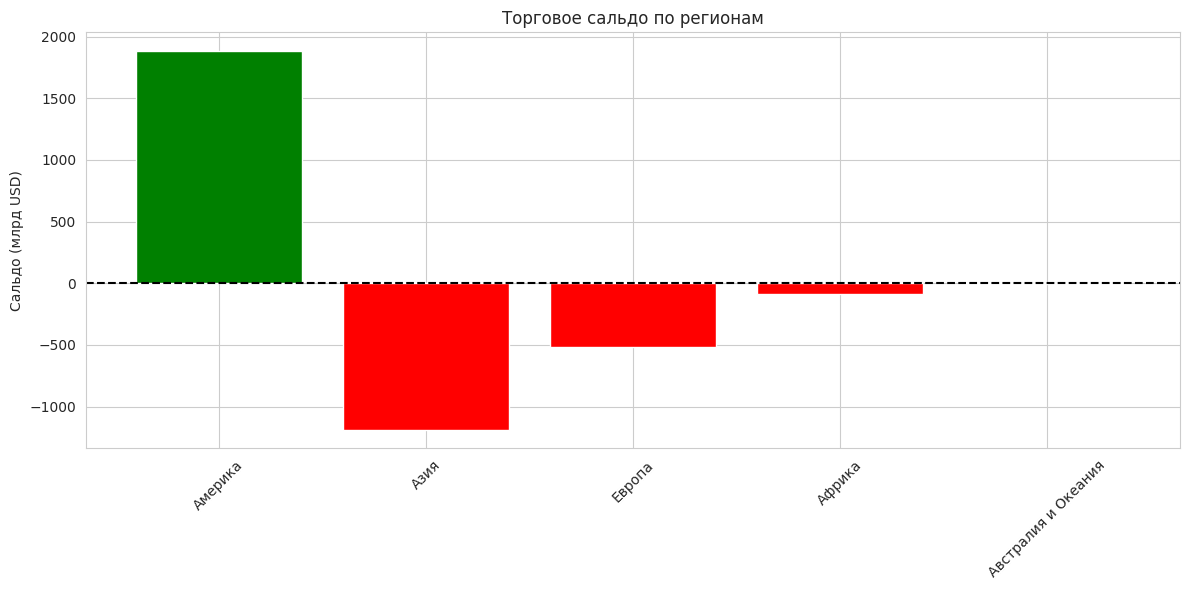


=== Торговля по регионам по годам ===


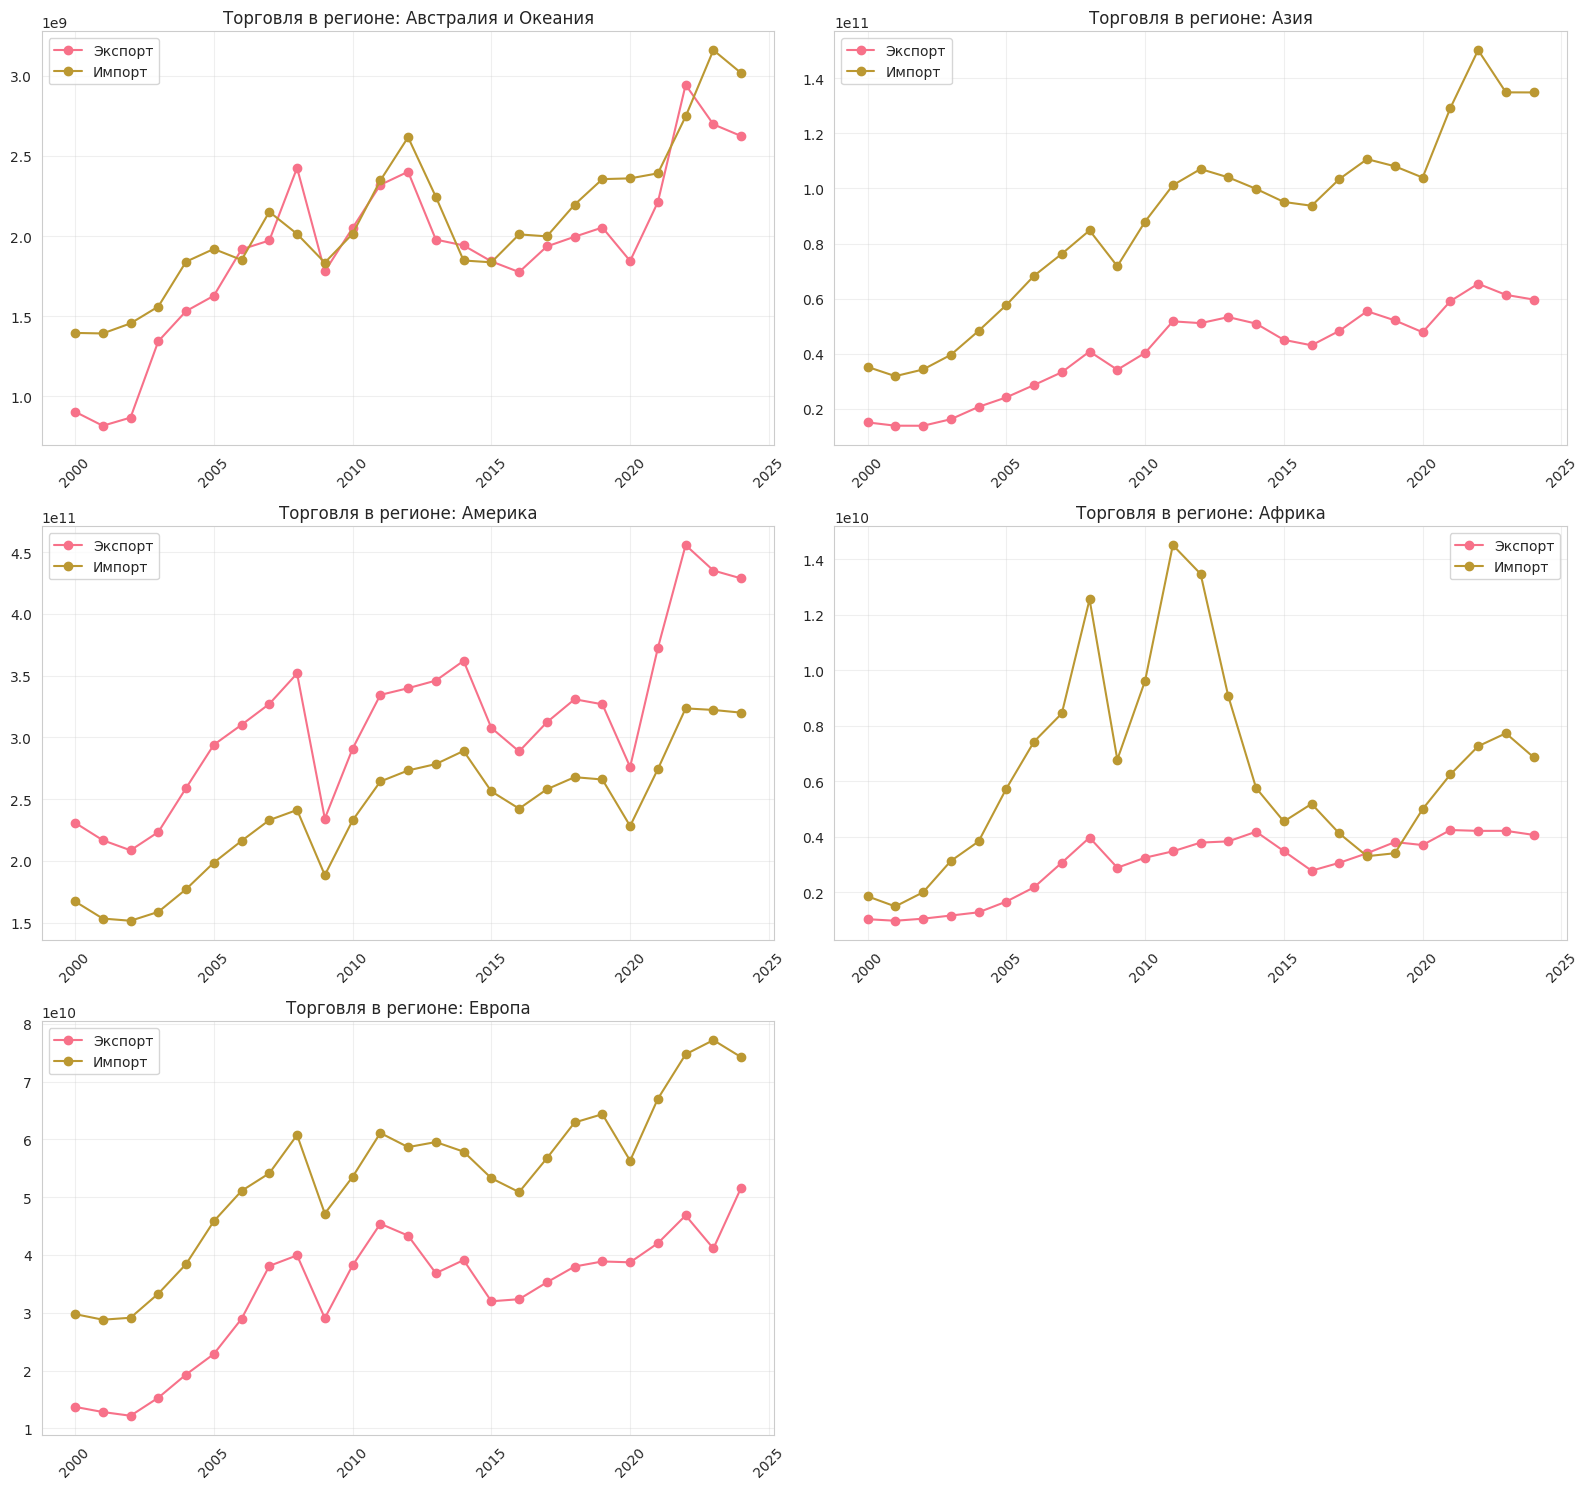


=== Анализ среднегодового роста (CAGR) ===


,CAGR Экспорт (%),CAGR Импорт (%)
Австралия и Океания,5,3
Азия,6,6
Америка,3,3
Африка,6,6
Европа,6,4


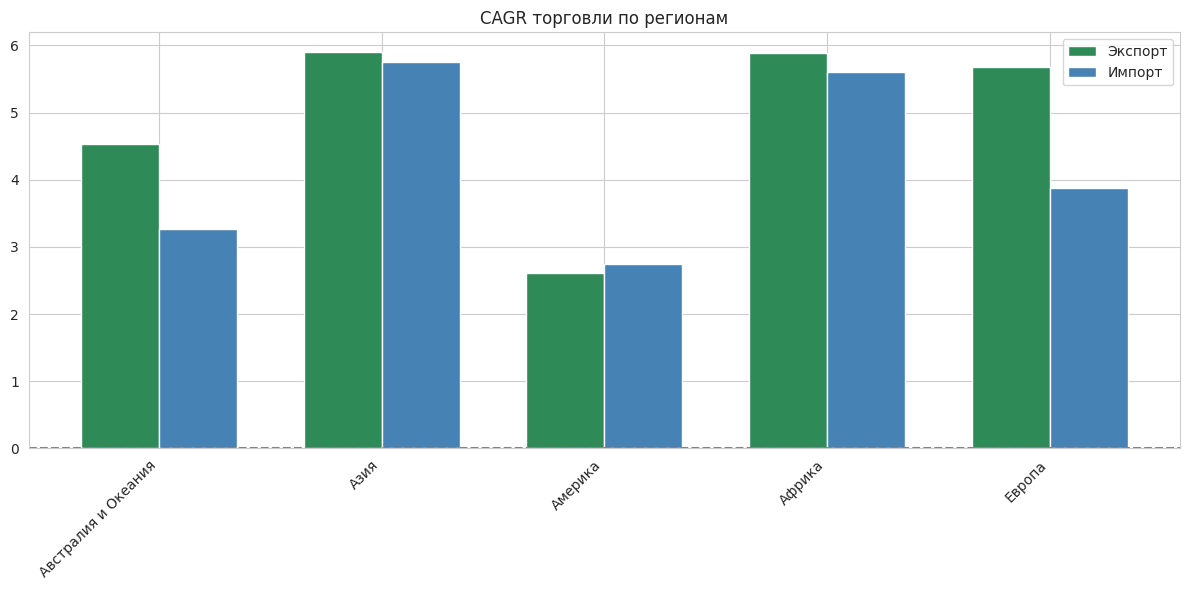


Топ-3 регионов по росту экспорта:
Азия     6
Африка   6
Европа   6
Name: CAGR Экспорт (%), dtype: float64

Топ-3 регионов по росту импорта:
Азия     6
Африка   6
Европа   4
Name: CAGR Импорт (%), dtype: float64


In [107]:
print("### Анализ распределения торговли по регионам мира ###")
overall_trade_df, total_trade_sum = analyze_total_trade(full_trade_data)
print("\nЭкспорт по регионам:")
export_region_sum, import_region_sum, export_total, import_total, export_summary, import_summary = analyze_export_import(full_trade_data)
print("\nСравнительный анализ торговли по регионам:")
region_comparison = compare_regions(export_region_sum, import_region_sum, export_total, import_total)
summarize_analysis(overall_trade_df, export_summary, import_summary, region_comparison, total_trade_sum, export_total, import_total)
visualize_trade(region_comparison)
print("\n=== Торговля по регионам по годам ===")
trade_agg = trade_dynamics_by_year(full_trade_data)
print("\n=== Анализ среднегодового роста (CAGR) ===")
analyze_cagr(trade_agg)


***5. Какие страны-партнёры были основными по объёму торговли?***



*  a) Сформируйте топ-10 стран по суммарному объёму торговли за последние 5 лет.
*   b) Определите положительное или отрицательное сальдо с этими странами.


In [108]:
def get_recent_data(df, years=5):
    latest_year = df['period'].max()
    years_to_consider = list(range(latest_year - years + 1, latest_year + 1))
    print(f"\n📅 Период анализа: {years_to_consider}")
    return df[df['period'].isin(years_to_consider)], years_to_consider

def compute_top_partners(data, top_n=10):
    trade_sum = data.groupby('partner_name')['primaryValue'].sum()
    top_partners = trade_sum.sort_values(ascending=False).head(top_n).to_frame(name='total_trade')
    total_all = trade_sum.sum()
    top_partners['trade_share_%'] = (top_partners['total_trade'] / total_all * 100).round(2)
    top_partners['rank'] = range(1, len(top_partners) + 1)
    return top_partners.reset_index()[['rank', 'partner_name', 'total_trade', 'trade_share_%']]

def compute_trade_balance(data, top_countries):
    filtered = data[data['partner_name'].isin(top_countries)]
    trade = filtered.pivot_table(index='partner_name', columns='flowCode', values='primaryValue', aggfunc='sum', fill_value=0)
    trade = trade.rename(columns={'X': 'Экспорт', 'M': 'Импорт'})
    trade['Торговое сальдо'] = trade['Экспорт'] - trade['Импорт']
    trade['Товарооборот'] = trade['Экспорт'] + trade['Импорт']
    trade['Характер сальдо'] = trade['Торговое сальдо'].apply(
        lambda x: 'Положительное' if x > 0 else ('Отрицательное' if x < 0 else 'Нулевое')
    )
    trade['Коэффициент покрытия'] = (trade['Экспорт'] / trade['Импорт'].replace(0, 1)).round(3)
    return trade.sort_values(by='Товарооборот', ascending=False).reset_index()

def visualize_all(top_partners, balance_data):
    fig, axs = plt.subplots(3, 2, figsize=(16, 18))
    fig.suptitle('Анализ топ-10 стран-партнёров по внешней торговле', fontsize=16, fontweight='bold')

    # График 1
    axs[0, 0].barh(top_partners['partner_name'], top_partners['total_trade'], color='mediumslateblue')
    axs[0, 0].invert_yaxis()
    axs[0, 0].set_title('Объем торговли')
    axs[0, 0].set_xlabel('USD')

    # График 2
    axs[0, 1].pie(top_partners['trade_share_%'], labels=top_partners['partner_name'],
                  autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
    axs[0, 1].set_title('Доля в общем обороте')

    # График 3
    x = range(len(balance_data))
    width = 0.35
    axs[1, 0].bar([i - width/2 for i in x], balance_data['Экспорт'], width, label='Экспорт', color='forestgreen')
    axs[1, 0].bar([i + width/2 for i in x], balance_data['Импорт'], width, label='Импорт', color='royalblue')
    axs[1, 0].set_xticks(x)
    axs[1, 0].set_xticklabels(balance_data['partner_name'], rotation=45, ha='right')
    axs[1, 0].set_title('Экспорт / Импорт')
    axs[1, 0].legend()

    # График 4
    axs[1, 1].bar(balance_data['partner_name'], balance_data['Торговое сальдо'],
                 color=['seagreen' if val > 0 else 'indianred' for val in balance_data['Торговое сальдо']])
    axs[1, 1].axhline(0, color='black', linewidth=0.8)
    axs[1, 1].set_xticks(range(len(balance_data)))
    axs[1, 1].set_xticklabels(balance_data['partner_name'], rotation=45, ha='right')
    axs[1, 1].set_title('Торговое сальдо')
    axs[1, 1].set_ylabel('USD')

    # График 5
    axs[2, 0].bar(balance_data['partner_name'], balance_data['Коэффициент покрытия'], color='orange')
    axs[2, 0].axhline(1, color='red', linestyle='--', label='Паритет')
    axs[2, 0].set_title('Коэффициент покрытия')
    axs[2, 0].legend()

    # График 6 — накопительная доля
    cumulative = top_partners['trade_share_%'].cumsum()
    axs[2, 1].plot(range(1, len(cumulative)+1), cumulative, marker='o', color='navy')
    axs[2, 1].fill_between(range(1, len(cumulative)+1), cumulative, alpha=0.2)
    axs[2, 1].set_title('Накопительная доля')
    axs[2, 1].set_xlabel('Количество стран')
    axs[2, 1].set_ylabel('%')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

def summarize(balance_data, top_partners):
    print("\n📊 Итоговый анализ торгового сальдо:")
    surplus = balance_data[balance_data['Торговое сальдо'] > 0]
    deficit = balance_data[balance_data['Торговое сальдо'] < 0]

    if not surplus.empty:
        print("\n✅ Страны с положительным сальдо:")
        for _, row in surplus.iterrows():
            print(f" - {row['partner_name']}: {row['Торговое сальдо']:,.0f} USD")

    if not deficit.empty:
        print("\n⚠️ Страны с отрицательным сальдо:")
        for _, row in deficit.iterrows():
            print(f" - {row['partner_name']}: {row['Торговое сальдо']:,.0f} USD")

    total_exp = balance_data['Экспорт'].sum()
    total_imp = balance_data['Импорт'].sum()
    total_balance = total_exp - total_imp

    print(f"\n📦 Общий экспорт: {total_exp:,.0f} USD")
    print(f"📥 Общий импорт: {total_imp:,.0f} USD")
    print(f"💰 Торговое сальдо: {total_balance:,.0f} USD")
    print(f"📈 Коэффициент покрытия: {(total_exp / total_imp):.3f}")
    print(f"📊 Доля топ-10 в общем обороте: {top_partners['trade_share_%'].sum():.1f}%")

    print("\n🔍 Ключевые выводы:")
    print(f" - Главный партнёр: {top_partners.iloc[0]['partner_name']} ({top_partners.iloc[0]['trade_share_%']}%)")
    print(f" - Концентрация: топ-3 стран = {top_partners.head(3)['trade_share_%'].sum():.1f}%")
    print(f" - Стран с профицитом: {len(surplus)}, с дефицитом: {len(deficit)}")


=== АНАЛИЗ СТРАН-ПАРТНЕРОВ ПО ОБЪЕМУ ТОРГОВЛИ ===

📅 Период анализа: [2020, 2021, 2022, 2023, 2024]

📋 Топ-10 стран-партнёров:


,rank,partner_name,total_trade,trade_share_%
0,1,США,"3,113,713,187,048",62
1,2,Китай,"439,935,669,252",9
2,3,Мексика,"179,461,502,858",4
3,4,Япония,"122,480,361,458",2
4,5,Великобритания,"104,671,097,907",2
5,6,Германия,"102,492,624,824",2
6,7,Республика Корея,"73,775,239,471",1
7,8,Италия,"53,995,997,997",1
8,9,Вьетнам,"47,332,853,930",1
9,10,Франция,"44,879,418,884",1



📈 Баланс торговли по странам:


flowCode,partner_name,Импорт,Экспорт,Торговое сальдо,Товарооборот,Характер сальдо,Коэффициент покрытия
0,США,"1,216,706,792,869","1,897,006,394,179","680,299,601,310","3,113,713,187,048",Положительное,2
1,Китай,"332,453,338,616","107,482,330,636","-224,971,007,980","439,935,669,252",Отрицательное,0
2,Мексика,"148,838,510,469","30,622,992,390","-118,215,518,079","179,461,502,858",Отрицательное,0
3,Япония,"65,722,545,453","56,757,816,005","-8,964,729,448","122,480,361,458",Отрицательное,1
4,Великобритания,"31,548,723,143","73,122,374,765","41,573,651,622","104,671,097,907",Положительное,2
5,Германия,"80,072,036,386","22,420,588,438","-57,651,447,948","102,492,624,824",Отрицательное,0
6,Республика Корея,"48,043,928,470","25,731,311,001","-22,312,617,469","73,775,239,471",Отрицательное,1
7,Италия,"42,608,512,323","11,387,485,674","-31,221,026,649","53,995,997,997",Отрицательное,0
8,Вьетнам,"44,258,320,077","3,074,533,853","-41,183,786,224","47,332,853,930",Отрицательное,0
9,Франция,"29,679,159,525","15,200,259,360","-14,478,900,165","44,879,418,884",Отрицательное,1


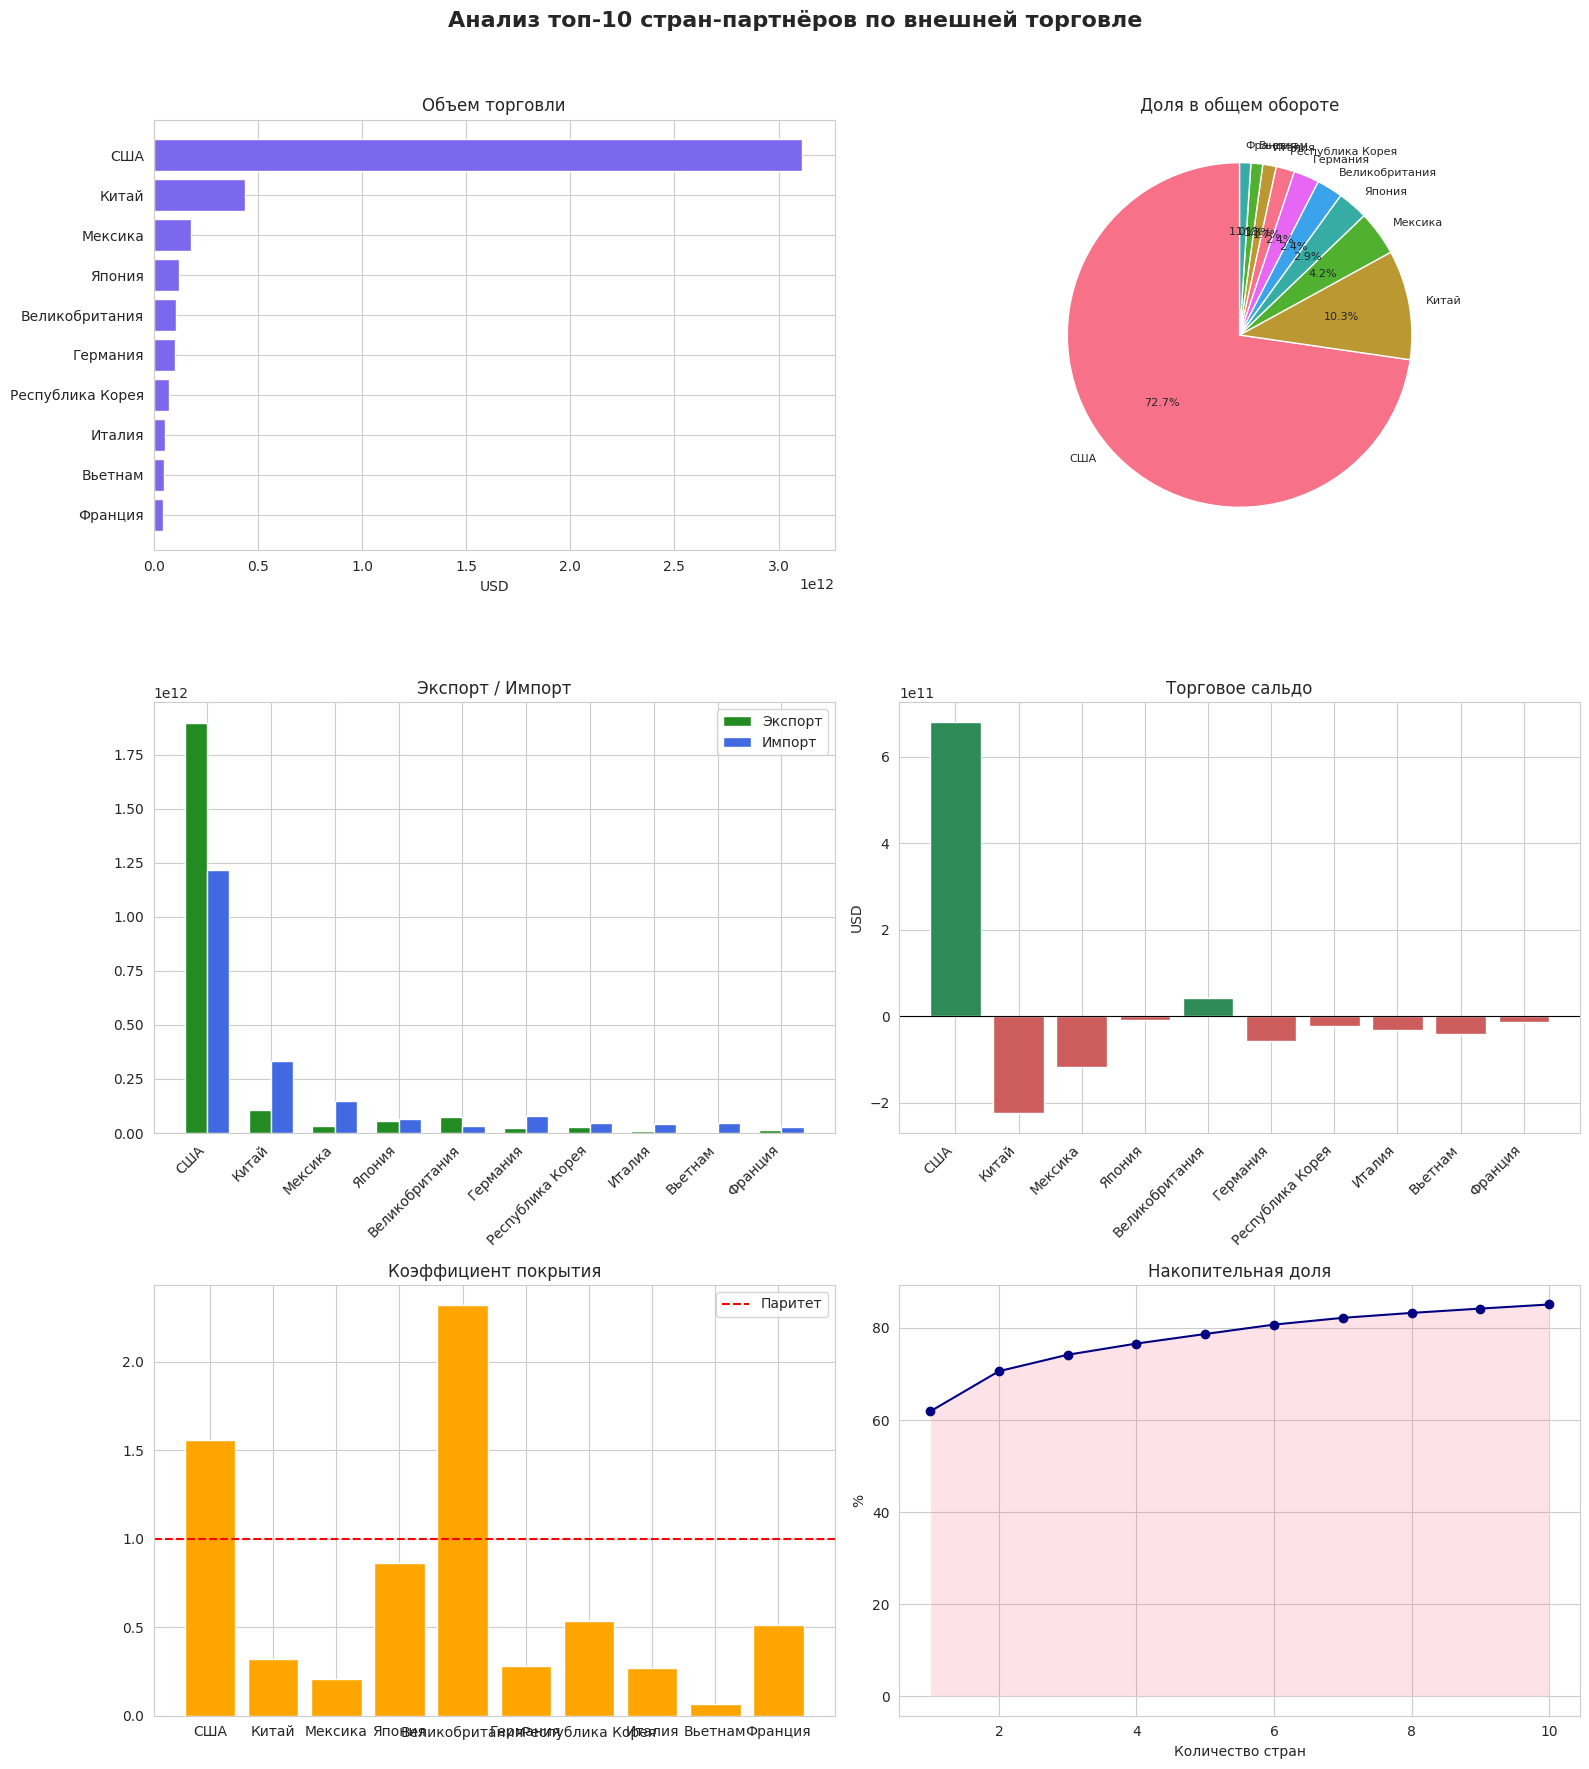


📊 Итоговый анализ торгового сальдо:

✅ Страны с положительным сальдо:
 - США: 680,299,601,310 USD
 - Великобритания: 41,573,651,622 USD

⚠️ Страны с отрицательным сальдо:
 - Китай: -224,971,007,980 USD
 - Мексика: -118,215,518,079 USD
 - Япония: -8,964,729,448 USD
 - Германия: -57,651,447,948 USD
 - Республика Корея: -22,312,617,469 USD
 - Италия: -31,221,026,649 USD
 - Вьетнам: -41,183,786,224 USD
 - Франция: -14,478,900,165 USD

📦 Общий экспорт: 2,242,806,086,300 USD
📥 Общий импорт: 2,039,931,867,330 USD
💰 Торговое сальдо: 202,874,218,969 USD
📈 Коэффициент покрытия: 1.099
📊 Доля топ-10 в общем обороте: 85.1%

🔍 Ключевые выводы:
 - Главный партнёр: США (61.87%)
 - Концентрация: топ-3 стран = 74.2%
 - Стран с профицитом: 2, с дефицитом: 8


In [109]:
print("=== АНАЛИЗ СТРАН-ПАРТНЕРОВ ПО ОБЪЕМУ ТОРГОВЛИ ===")
data_recent, years_range = get_recent_data(full_trade_data)
top_partners_df = compute_top_partners(data_recent)
print("\n📋 Топ-10 стран-партнёров:")
display(top_partners_df)

top_countries = top_partners_df['partner_name'].tolist()
balance_data = compute_trade_balance(data_recent, top_countries)
print("\n📈 Баланс торговли по странам:")
display(balance_data)

visualize_all(top_partners_df, balance_data)
summarize(balance_data, top_partners_df)

***6. Кто был ключевым торговым партнёром в последнем году?***



*   a) Назовите страну с наибольшим товарооборотом.
*   b) Опишите структуру экспорта и импорта с этой страной.




In [110]:
def get_last_year(data):
    """Определяет последний год в датасете."""
    return data['period'].max()

def filter_data_by_year(data, year):
    """Отбирает данные за указанный год."""
    return data.query("period == @year")

def get_top_partner(trade_data):
    """Возвращает страну с максимальным товарооборотом и сам оборот."""
    turnover_by_country = trade_data.groupby('partner_name')['primaryValue'].sum()
    turnover_by_country = turnover_by_country.sort_values(ascending=False)
    top_country = turnover_by_country.index[0]
    top_turnover = turnover_by_country.iloc[0]
    return top_country, top_turnover, turnover_by_country

def calculate_trade_flow(trade_data, country):
    """Вычисляет экспорт, импорт и сальдо с конкретной страной."""
    country_data = trade_data[trade_data['partner_name'] == country]
    export = country_data.loc[country_data['flowCode'] == 'X', 'primaryValue'].sum()
    import_ = country_data.loc[country_data['flowCode'] == 'M', 'primaryValue'].sum()
    saldo = export - import_
    return export, import_, saldo, country_data

def analyze_commodity_structure(country_data, flow_code, top_n=10):
    """Анализирует структуру товаров по направлению торговли (экспорт/импорт)."""
    flow_data = (
        country_data.query("flowCode == @flow_code")
        .groupby('commodity_name')['primaryValue']
        .sum()
        .sort_values(ascending=False)
        .head(top_n)
        .reset_index()
    )
    flow_data.columns = ['Товар', 'Объем']
    total = flow_data['Объем'].sum()
    if total == 0:
        flow_data['Доля (%)'] = 0
    else:
        flow_data['Доля (%)'] = (flow_data['Объем'] / total * 100).round(2)
    return flow_data

def analyze_economic_sectors(country_data):
    """Анализ торговли по секторам экономики."""
    sectors = country_data.pivot_table(
        values='primaryValue',
        index='economic_sector',
        columns='flowCode',
        aggfunc='sum',
        fill_value=0
    )
    sectors.rename(columns={'X': 'Экспорт', 'M': 'Импорт'}, inplace=True)
    sectors['Общий товарооборот'] = sectors['Экспорт'] + sectors['Импорт']
    sectors['Торговое сальдо'] = sectors['Экспорт'] - sectors['Импорт']
    sectors = sectors.sort_values(by='Общий товарооборот', ascending=False)
    return sectors.round(2)

def plot_trade_analysis(top10, top_country, top_turnover, total_turnover, export, import_, saldo, year):
    """Строит графики анализа торговых отношений."""
    plt.figure(figsize=(14, 10))

    # Гистограмма топ-10 стран по товарообороту
    plt.subplot(2, 2, 1)
    plt.barh(top10['Страна'], top10['Товарооборот'], color='teal')
    plt.gca().invert_yaxis()
    plt.title(f'Топ-10 торговых партнеров в {year}')
    plt.xlabel('Товарооборот (USD)')

    # Круговая диаграмма доли топовой страны в общем товарообороте
    plt.subplot(2, 2, 2)
    shares = [top_turnover, total_turnover - top_turnover]
    labels = [top_country, 'Остальные страны']
    plt.pie(shares, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Доля {top_country} в общем товарообороте')

    # Экспорт и импорт с топовой страной
    plt.subplot(2, 2, 3)
    plt.bar(['Экспорт', 'Импорт'], [export, import_], color=['forestgreen', 'darkorange'])
    plt.title(f'Экспорт и импорт с {top_country}')
    plt.ylabel('Сумма (USD)')

    # Торговое сальдо
    plt.subplot(2, 2, 4)
    saldo_color = 'green' if saldo >= 0 else 'red'
    plt.bar(['Сальдо'], [saldo], color=saldo_color)
    plt.title(f'Торговое сальдо с {top_country}')
    plt.ylabel('Сумма (USD)')

    plt.tight_layout()
    plt.show()

def print_summary(top_country, top_turnover, total_turnover, export, import_, saldo, export_commodities, import_commodities, year):
    """Печатает основные выводы анализа."""
    print(f"\n=== ОСНОВНЫЕ ВЫВОДЫ ПО ТОРГОВЛЕ С {top_country.upper()} ЗА {year} ГОД ===")
    print(f"1. {top_country} является главным торговым партнером с товарооборотом в {top_turnover:,.0f} USD.")
    print(f"2. Доля {top_country} в общем товарообороте составляет {(top_turnover / total_turnover * 100):.1f}%.")
    print(f"3. Торговое сальдо {'положительное (профицит)' if saldo > 0 else 'отрицательное (дефицит)'} и составляет {saldo:,.0f} USD.")
    if import_ == 0:
        print("4. Импорт равен 0, коэффициент покрытия экспорта к импорту не рассчитывается.")
    else:
        print(f"4. Коэффициент покрытия импорта экспортом равен {export / import_:.2f}.")

    if not export_commodities.empty:
        print(f"5. Ведущий экспортируемый товар — '{export_commodities.iloc[0]['Товар']}' с долей {export_commodities.iloc[0]['Доля (%)']}% в экспорте.")

    if not import_commodities.empty:
        print(f"6. Главный импортируемый товар — '{import_commodities.iloc[0]['Товар']}' с долей {import_commodities.iloc[0]['Доля (%)']}% в импорте.")


=== АНАЛИЗ КЛЮЧЕВОГО ТОРГОВОГО ПАРТНЕРА ЗА ПОСЛЕДНИЙ ГОД ===
Рассматриваемый период: 2024
Наибольший товарооборот в 2024 году с: США
Общий товарооборот: 675,951,212,979 долларов США

Топ-10 торговых партнеров по итогам года:
             Страна    Товарооборот  Доля_в_торговле (%)
0               США 675,951,212,979                   62
1             Китай  85,686,819,904                    8
2           Мексика  40,343,966,706                    4
3    Великобритания  27,132,277,324                    2
4            Япония  25,958,798,190                    2
5          Германия  21,434,862,936                    2
6  Республика Корея  17,724,646,445                    2
7           Вьетнам  11,368,693,214                    1
8            Италия  11,264,899,388                    1
9           Франция  10,134,647,692                    1

=== СТРУКТУРА ТОРГОВЛИ С США ===
Экспорт в США: 414,576,268,509 USD
Импорт из США: 261,374,944,470 USD
Торговое сальдо: 153,201,324,038 USD
Доля СШ

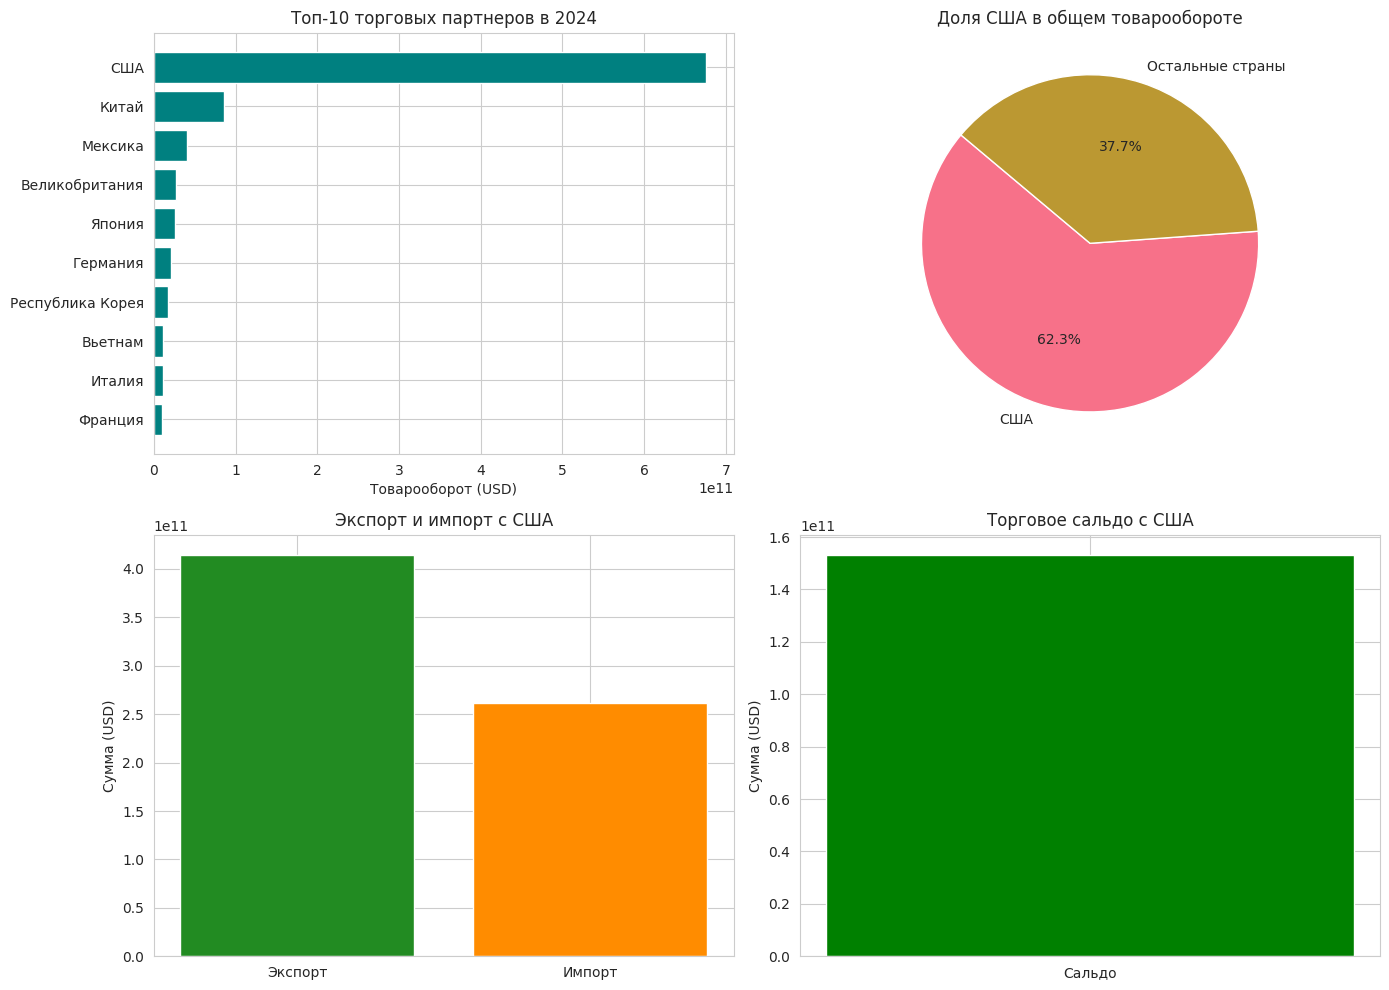


=== АНАЛИЗ ТОРГОВЛИ ПО СЕКТОРАМ ЭКОНОМИКИ С США ===
flowCode                                                  Импорт  \
economic_sector                                                    
Машиностроение и электроника                     110,542,294,295   
Топливно-энергетический комплекс                  26,753,150,220   
Сельское хозяйство и пищевая промышленность       28,167,942,734   
Химическая промышленность                         26,655,349,700   
Металлургия и металлообработка                    17,504,086,996   
Пластмассы, резина и изделия из них               16,326,917,071   
Минеральные материалы и изделия из них             9,146,231,324   
Целлюлозно-бумажная промышленность                 7,095,645,097   
Кожевенная и деревообрабатывающая промышленность   2,324,803,853   
Приборостроение и высокие технологии               6,746,597,197   
Промтовары и мебель                                4,503,688,466   
Строительные материалы и сырьё                     3,146,041,99

In [112]:
print("=== АНАЛИЗ КЛЮЧЕВОГО ТОРГОВОГО ПАРТНЕРА ЗА ПОСЛЕДНИЙ ГОД ===")

year = get_last_year(full_trade_data)
print(f"Рассматриваемый период: {year}")

data_year = filter_data_by_year(full_trade_data, year)
top_country, top_turnover, turnover_by_country = get_top_partner(data_year)

print(f"Наибольший товарооборот в {year} году с: {top_country}")
print(f"Общий товарооборот: {top_turnover:,.0f} долларов США")

top10 = turnover_by_country.head(10).reset_index()
top10.columns = ['Страна', 'Товарооборот']
total_turnover = turnover_by_country.sum()
top10['Доля_в_торговле (%)'] = (top10['Товарооборот'] / total_turnover * 100).round(2)

print("\nТоп-10 торговых партнеров по итогам года:")
print(top10)

print(f"\n=== СТРУКТУРА ТОРГОВЛИ С {top_country.upper()} ===")

export, import_, saldo, country_data = calculate_trade_flow(data_year, top_country)

print(f"Экспорт в {top_country}: {export:,.0f} USD")
print(f"Импорт из {top_country}: {import_:,.0f} USD")
print(f"Торговое сальдо: {saldo:,.0f} USD")
print(f"Доля {top_country} в общем товарообороте: {(top_turnover / total_turnover * 100):.1f}%")

export_commodities = analyze_commodity_structure(country_data, 'X')
import_commodities = analyze_commodity_structure(country_data, 'M')

print("\nТоп-10 экспортируемых товаров:")
print(export_commodities)

print("\nТоп-10 импортируемых товаров:")
print(import_commodities)

plot_trade_analysis(top10, top_country, top_turnover, total_turnover, export, import_, saldo, year)

sectors = analyze_economic_sectors(country_data)
print(f"\n=== АНАЛИЗ ТОРГОВЛИ ПО СЕКТОРАМ ЭКОНОМИКИ С {top_country.upper()} ===")
print(sectors)

print_summary(top_country, top_turnover, total_turnover, export, import_, saldo, export_commodities, import_commodities, year)

***7. Какова динамика торговли с Российской Федерацией за последние 5 лет?***



*   a) Как изменялись экспорт и импорт по годам?



=== ДИНАМИКА ТОРГОВЛИ С КАНАДА ЗА ПОСЛЕДНИЕ 5 ЛЕТ ===
Анализ динамики торговли с Канада за 2020, 2021, 2022, 2023, 2024

Динамика экспорта и импорта с Канада по годам:


flowCode,Импорт,Экспорт,Торговое сальдо,Товарооборот
period,,,,
2000,"235,411,244,737","261,607,675,172","26,196,430,435","497,018,919,909"
2001,"216,832,017,788","245,217,574,539","28,385,556,751","462,049,592,327"
2002,"218,371,968,028","236,489,045,637","18,117,077,609","454,861,013,665"
2003,"236,264,489,605","257,370,724,764","21,106,235,159","493,635,214,369"
2004,"269,415,710,265","301,760,659,327","32,344,949,062","571,176,369,592"
2005,"309,751,695,955","344,329,136,154","34,577,440,199","654,080,832,109"
2006,"344,867,455,545","371,886,140,258","27,018,684,713","716,753,595,803"
2007,"374,040,823,846","403,530,317,204","29,489,493,358","777,571,141,050"
2008,"401,334,086,650","438,909,830,523","37,575,743,873","840,243,917,173"



Темпы роста по сравнению с предыдущим годом (%):
flowCode  Импорт  Экспорт  Торговое сальдо  Товарооборот
period                                                  
2000         NaN      NaN              NaN           NaN
2001          -8       -6                8            -7
2002           1       -4              -36            -2
2003           8        9               16             9
2004          14       17               53            16
2005          15       14                7            15
2006          11        8              -22            10
2007           8        9                9             8
2008           7        9               27             8
2009         -21      -31             -137           -26
2010          22       24              -19            23
2011          15       17              -46            16
2012           3        1              140             2
2013          -0        0              -22            -0
2014           0        4             

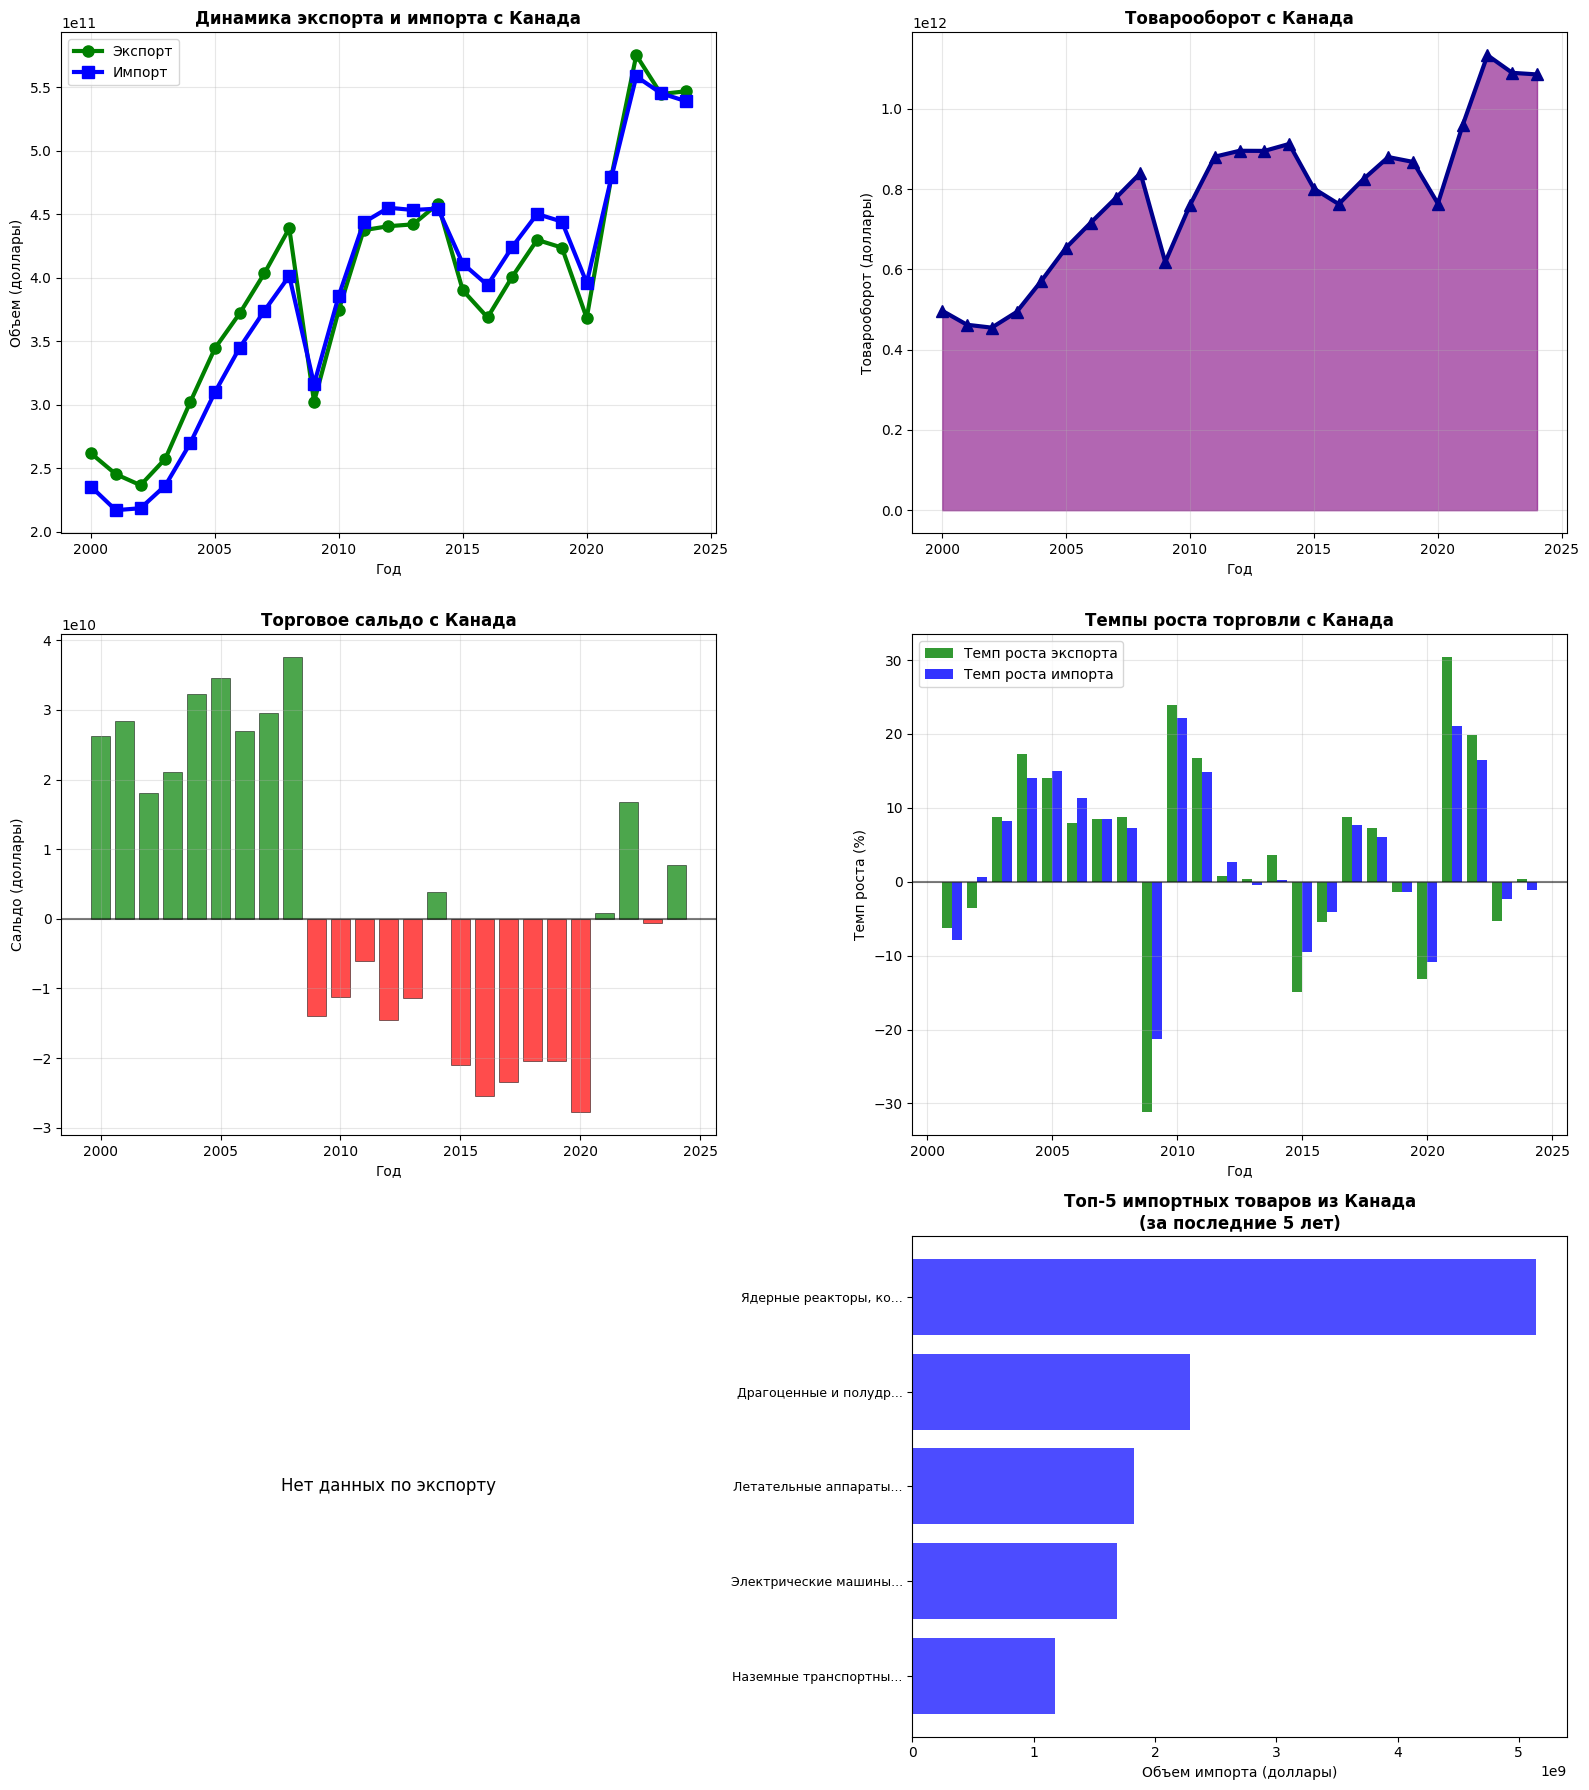


=== СТАТИСТИЧЕСКИЙ АНАЛИЗ ТОРГОВЛИ С КАНАДА ===
Среднегодовые показатели за 5 лет:
  Экспорт: 393,749,107,102 долларов
  Импорт: 390,238,818,006 долларов
  Товарооборот: 783,987,925,109 долларов
  Торговое сальдо: 3,510,289,096 долларов

Среднегодовой темп роста экспорта (CAGR): 3.12%
Среднегодовой темп роста импорта (CAGR): 3.51%

=== КЛЮЧЕВЫЕ ВЫВОДЫ ===
1. Пиковый товарооборот: 1,133,657,036,920 долларов в 2022 году
2. Лет с положительным торговым сальдо: 13 из 25
4. Основной импортный товар: Ядерные реакторы, котлы, оборудование и механические устройства


In [127]:

country_name = "Канада"
print(f"=== ДИНАМИКА ТОРГОВЛИ С {country_name.upper()} ЗА ПОСЛЕДНИЕ 5 ЛЕТ ===")

last_5_years = [int(x) for x in unique_years[-5:]]

print(f"Анализ динамики торговли с {country_name} за {', '.join(map(str, last_5_years))}")


# Фильтруем данные по стране и последним 5 годам
country_data = full_trade_data[
    (full_trade_data['partner_name'] == country_name) &
    (full_trade_data['period'].isin(last_5_years))
]

if len(country_data) == 0:
    print(f"Данные по стране '{country_name}' не найдены. Проверьте правильность названия.")
    # Показываем доступные страны
    available_countries = full_trade_data['partner_name'].unique()[:20]
    print(f"Доступные страны (первые 20): {list(available_countries)}")
else:
    # a) Группируем по году и типу потока
    trade_dynamics = (
      full_trade_data
      .groupby(['period', 'flowCode'])['primaryValue']
      .sum()
      .unstack(fill_value=0)
      .rename(columns={'X': 'Экспорт', 'M': 'Импорт'})
    )

    # Округление значений
    trade_dynamics = trade_dynamics.round(2)

    # Добавляем расчетные показатели: торговое сальдо и товарооборот
    trade_dynamics['Торговое сальдо'] = trade_dynamics['Экспорт'] - trade_dynamics['Импорт']
    trade_dynamics['Товарооборот'] = trade_dynamics['Экспорт'] + trade_dynamics['Импорт']

    print(f"\nДинамика экспорта и импорта с {country_name} по годам:")
    display(trade_dynamics)

# Рассчитываем темпы роста
    trade_growth = trade_dynamics.pct_change() * 100
    print(f"\nТемпы роста по сравнению с предыдущим годом (%):")
    print(trade_growth.round(2))

    # Топ-5 товаров в торговле с этой страной за последние 5 лет
    top_export_goods = (country_data[country_data['flowCode'] == 'X']
                        .groupby('commodity_name')['primaryValue']
                        .sum()
                        .sort_values(ascending=False)
                        .head(5)
                        .reset_index())
    top_export_goods.columns = ['Товар', 'Объем экспорта (доллары)']

    top_import_goods = (country_data[country_data['flowCode'] == 'M']
                        .groupby('commodity_name')['primaryValue']
                        .sum()
                        .sort_values(ascending=False)
                        .head(5)
                        .reset_index())
    top_import_goods.columns = ['Товар', 'Объем импорта (доллары)']

    print(f"\nТоп-5 экспортных товаров в {country_name} за последние 5 лет:")
    print(top_export_goods)
    print(f"\nТоп-5 импортных товаров из {country_name} за последние 5 лет:")
    print(top_import_goods)

    # ВИЗУАЛИЗАЦИИ
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Настройка стиля
    plt.style.use('default')
    sns.set_palette("husl")

    # Создаем фигуру с подграфиками (3 строки, 2 столбца)
    fig, axes = plt.subplots(3, 2, figsize=(16, 18))

    # График 1: Динамика экспорта и импорта
    axes[0, 0].plot(trade_dynamics.index, trade_dynamics['Экспорт'],
                    marker='o', label='Экспорт', linewidth=3, markersize=8, color='green')
    axes[0, 0].plot(trade_dynamics.index, trade_dynamics['Импорт'],
                    marker='s', label='Импорт', linewidth=3, markersize=8, color='blue')
    axes[0, 0].set_title(f'Динамика экспорта и импорта с {country_name}', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Год')
    axes[0, 0].set_ylabel('Объем (доллары)')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # График 2: Товарооборот
    axes[0, 1].fill_between(trade_dynamics.index, trade_dynamics['Товарооборот'],
                            alpha=0.6, color='purple')
    axes[0, 1].plot(trade_dynamics.index, trade_dynamics['Товарооборот'],
                    marker='^', color='darkblue', linewidth=3, markersize=8)
    axes[0, 1].set_title(f'Товарооборот с {country_name}', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Год')
    axes[0, 1].set_ylabel('Товарооборот (доллары)')
    axes[0, 1].grid(True, alpha=0.3)

    # График 3: Торговое сальдо
    colors = ['green' if x > 0 else 'red' for x in trade_dynamics['Торговое сальдо']]
    axes[1, 0].bar(trade_dynamics.index, trade_dynamics['Торговое сальдо'],
                   color=colors, alpha=0.7, edgecolor='black', linewidth=0.5)
    axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.5)
    axes[1, 0].set_title(f'Торговое сальдо с {country_name}', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Год')
    axes[1, 0].set_ylabel('Сальдо (доллары)')
    axes[1, 0].grid(True, alpha=0.3)

    # График 4: Темпы роста
    if len(trade_growth) > 1:
        years_growth = trade_growth.index[1:]  # исключаем первый год (NaN)
        axes[1, 1].bar([x - 0.2 for x in years_growth], trade_growth['Экспорт'][1:],
                       width=0.4, label='Темп роста экспорта', alpha=0.8, color='green')
        axes[1, 1].bar([x + 0.2 for x in years_growth], trade_growth['Импорт'][1:],
                       width=0.4, label='Темп роста импорта', alpha=0.8, color='blue')
        axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
        axes[1, 1].set_title(f'Темпы роста торговли с {country_name}', fontsize=12, fontweight='bold')
        axes[1, 1].set_xlabel('Год')
        axes[1, 1].set_ylabel('Темп роста (%)')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)

    # График 5: Топ-5 экспортных товаров
    if len(top_export_goods) > 0:
        axes[2, 0].barh(range(len(top_export_goods)), top_export_goods['Объем экспорта (доллары)'],
                        color='green', alpha=0.7)
        axes[2, 0].set_yticks(range(len(top_export_goods)))
        axes[2, 0].set_yticklabels([name[:20] + '...' if len(name) > 20 else name
                                   for name in top_export_goods['Товар']], fontsize=9)
        axes[2, 0].set_title(f'Топ-5 экспортных товаров в {country_name}\n(за последние 5 лет)',
                             fontsize=12, fontweight='bold')
        axes[2, 0].set_xlabel('Объем экспорта (доллары)')
        axes[2, 0].invert_yaxis()
    else:
        axes[2, 0].text(0.5, 0.5, 'Нет данных по экспорту', ha='center', va='center', fontsize=12)
        axes[2, 0].set_axis_off()

    # График 6: Топ-5 импортных товаров
    if len(top_import_goods) > 0:
        axes[2, 1].barh(range(len(top_import_goods)), top_import_goods['Объем импорта (доллары)'],
                        color='blue', alpha=0.7)
        axes[2, 1].set_yticks(range(len(top_import_goods)))
        axes[2, 1].set_yticklabels([name[:20] + '...' if len(name) > 20 else name
                                   for name in top_import_goods['Товар']], fontsize=9)
        axes[2, 1].set_title(f'Топ-5 импортных товаров из {country_name}\n(за последние 5 лет)',
                             fontsize=12, fontweight='bold')
        axes[2, 1].set_xlabel('Объем импорта (доллары)')
        axes[2, 1].invert_yaxis()

    plt.tight_layout()
    plt.show()

    # Статистический анализ
    print(f"\n=== СТАТИСТИЧЕСКИЙ АНАЛИЗ ТОРГОВЛИ С {country_name.upper()} ===")

    # Среднегодовые показатели
    avg_export = trade_dynamics['Экспорт'].mean()
    avg_import = trade_dynamics['Импорт'].mean()
    avg_turnover = trade_dynamics['Товарооборот'].mean()
    avg_balance = trade_dynamics['Торговое сальдо'].mean()

    print(f"Среднегодовые показатели за {len(last_5_years)} лет:")
    print(f"  Экспорт: {avg_export:,.0f} долларов")
    print(f"  Импорт: {avg_import:,.0f} долларов")
    print(f"  Товарооборот: {avg_turnover:,.0f} долларов")
    print(f"  Торговое сальдо: {avg_balance:,.0f} долларов")

    # Среднегодовые темпы роста (CAGR)
    if len(trade_dynamics) > 1:
        first_year_export = trade_dynamics['Экспорт'].iloc[0]
        last_year_export = trade_dynamics['Экспорт'].iloc[-1]
        first_year_import = trade_dynamics['Импорт'].iloc[0]
        last_year_import = trade_dynamics['Импорт'].iloc[-1]

        years_span = len(trade_dynamics) - 1

        if first_year_export > 0:
            cagr_export = ((last_year_export / first_year_export) ** (1/years_span) - 1) * 100
            print(f"\nСреднегодовой темп роста экспорта (CAGR): {cagr_export:.2f}%")

        if first_year_import > 0:
            cagr_import = ((last_year_import / first_year_import) ** (1/years_span) - 1) * 100
            print(f"Среднегодовой темп роста импорта (CAGR): {cagr_import:.2f}%")

    # Ключевые выводы
    print(f"\n=== КЛЮЧЕВЫЕ ВЫВОДЫ ===")

    max_turnover_year = trade_dynamics['Товарооборот'].idxmax()
    max_turnover_value = trade_dynamics['Товарооборот'].max()

    print(f"1. Пиковый товарооборот: {max_turnover_value:,.0f} долларов в {max_turnover_year} году")

    positive_balance_years = (trade_dynamics['Торговое сальдо'] > 0).sum()
    print(f"2. Лет с положительным торговым сальдо: {positive_balance_years} из {len(trade_dynamics)}")

    if len(top_export_goods) > 0:
        print(f"3. Основной экспортный товар: {top_export_goods.iloc[0]['Товар']}")

    if len(top_import_goods) > 0:
        print(f"4. Основной импортный товар: {top_import_goods.iloc[0]['Товар']}")

***8. Как изменилась структура торговли за последние 10 лет?***



*   a) Появились ли новые товары и страны-партнёры?
*   b) Какие направления торговли утратили значимость?




=== ИЗМЕНЕНИЕ СТРУКТУРЫ ТОРГОВЛИ ЗА ПОСЛЕДНИЕ 10 ЛЕТ ===
Сравниваем 2014 и 2024 годы
Записей за 2014: 21364
Записей за 2024: 21645

Топ-10 товаров по экспорту в 2014 году:


,commodity_name,primaryValue
0,"Минеральные топлива, масла и продукты их перег...","128,817,557,944"
1,"Наземные транспортные средства, кроме Ж/Д","59,993,113,867"
2,"Ядерные реакторы, котлы, оборудование и механи...","32,644,194,098"
3,"Драгоценные и полудрагоценные камни, драгоценн...","20,640,343,088"
4,"Электрические машины и оборудование, аудио- и ...","13,642,592,730"
5,Пластмассы и изделия из них,"13,173,242,376"
6,Древесина и изделия из древесины; древесный уголь,"12,631,396,760"
7,Летательные аппараты и космические устройства,"12,439,905,873"
8,Алюминий и изделия из него,"8,851,103,963"
9,Зерновые культуры,"8,753,949,989"



Топ-10 товаров по экспорту в 2024 году:


,commodity_name,primaryValue
0,"Минеральные топлива, масла и продукты их перег...","144,995,461,499"
1,"Наземные транспортные средства, кроме Ж/Д","57,991,545,986"
2,"Ядерные реакторы, котлы, оборудование и механи...","41,006,996,633"
3,"Драгоценные и полудрагоценные камни, драгоценн...","33,091,529,408"
4,"Электрические машины и оборудование, аудио- и ...","17,451,794,032"
5,Пластмассы и изделия из них,"16,034,332,806"
6,Древесина и изделия из древесины; древесный уголь,"13,543,812,827"
7,Летательные аппараты и космические устройства,"13,211,989,712"
8,Алюминий и изделия из него,"12,805,331,157"
9,"Руды, шлак и зола","11,672,690,537"



Топ-10 товаров по импорту в 2014 году:


,commodity_name,primaryValue
0,"Наземные транспортные средства, кроме Ж/Д","70,526,487,531"
1,"Ядерные реакторы, котлы, оборудование и механи...","67,555,368,110"
2,"Минеральные топлива, масла и продукты их перег...","47,806,725,227"
3,"Электрические машины и оборудование, аудио- и ...","44,090,196,933"
4,Пластмассы и изделия из них,"16,071,861,244"
5,"Оптические, фотографические, измерительные, ме...","12,819,717,646"
6,"Драгоценные и полудрагоценные камни, драгоценн...","12,731,060,482"
7,Фармацевтическая продукция,"12,478,392,781"
8,Изделия из чёрных металлов,"11,715,283,183"
9,Мебель; постельные принадлежности; матрасы и др.,"9,214,660,305"



Топ-10 товаров по импорту в 2024 году:


,commodity_name,primaryValue
0,"Наземные транспортные средства, кроме Ж/Д","90,377,512,429"
1,"Ядерные реакторы, котлы, оборудование и механи...","82,659,579,026"
2,"Электрические машины и оборудование, аудио- и ...","52,079,805,037"
3,"Минеральные топлива, масла и продукты их перег...","34,609,252,455"
4,Пластмассы и изделия из них,"19,533,389,892"
5,"Драгоценные и полудрагоценные камни, драгоценн...","19,034,900,122"
6,Фармацевтическая продукция,"18,966,265,807"
7,"Оптические, фотографические, измерительные, ме...","15,627,494,314"
8,Изделия из чёрных металлов,"11,886,386,399"
9,Мебель; постельные принадлежности; матрасы и др.,"9,287,073,780"



Топ-10 стран по экспорту в 2014 году:


,partner_name,primaryValue
0,США,"349,217,377,184"
1,Китай,"17,402,349,743"
2,Великобритания,"13,644,620,391"
3,Япония,"9,616,609,445"
4,Мексика,"5,044,192,372"
5,Гонконг (САР Китая),"4,124,683,862"
6,Италия,"3,766,773,415"
7,Республика Корея,"3,740,476,173"
8,Нидерланды,"3,452,606,958"
9,Бельгия,"3,167,302,840"



Топ-10 стран по экспорту в 2024 году:


,partner_name,primaryValue
0,США,"414,576,268,509"
1,Китай,"21,719,514,345"
2,Великобритания,"20,557,587,043"
3,Япония,"10,805,091,505"
4,Мексика,"6,181,062,125"
5,Республика Корея,"5,527,038,250"
6,Нидерланды,"5,098,750,471"
7,Швейцария,"4,544,665,061"
8,Германия,"4,507,301,005"
9,Индия,"3,837,997,921"



Топ-10 стран по импорту в 2014 году:


,partner_name,primaryValue
0,США,"244,977,696,933"
1,Китай,"53,036,433,026"
2,Мексика,"25,783,297,589"
3,Германия,"14,312,112,600"
4,Япония,"12,039,450,371"
5,Великобритания,"8,137,637,215"
6,Республика Корея,"6,541,109,888"
7,Италия,"5,798,215,959"
8,Франция,"5,285,179,724"
9,Прочие страны Азии,"4,174,976,614"



Топ-10 стран по импорту в 2024 году:


,partner_name,primaryValue
0,США,"261,374,944,470"
1,Китай,"63,967,305,560"
2,Мексика,"34,162,904,580"
3,Германия,"16,927,561,931"
4,Япония,"15,153,706,684"
5,Республика Корея,"12,197,608,195"
6,Вьетнам,"10,634,938,354"
7,Италия,"8,894,996,010"
8,Бразилия,"7,433,540,290"
9,Франция,"6,988,452,127"


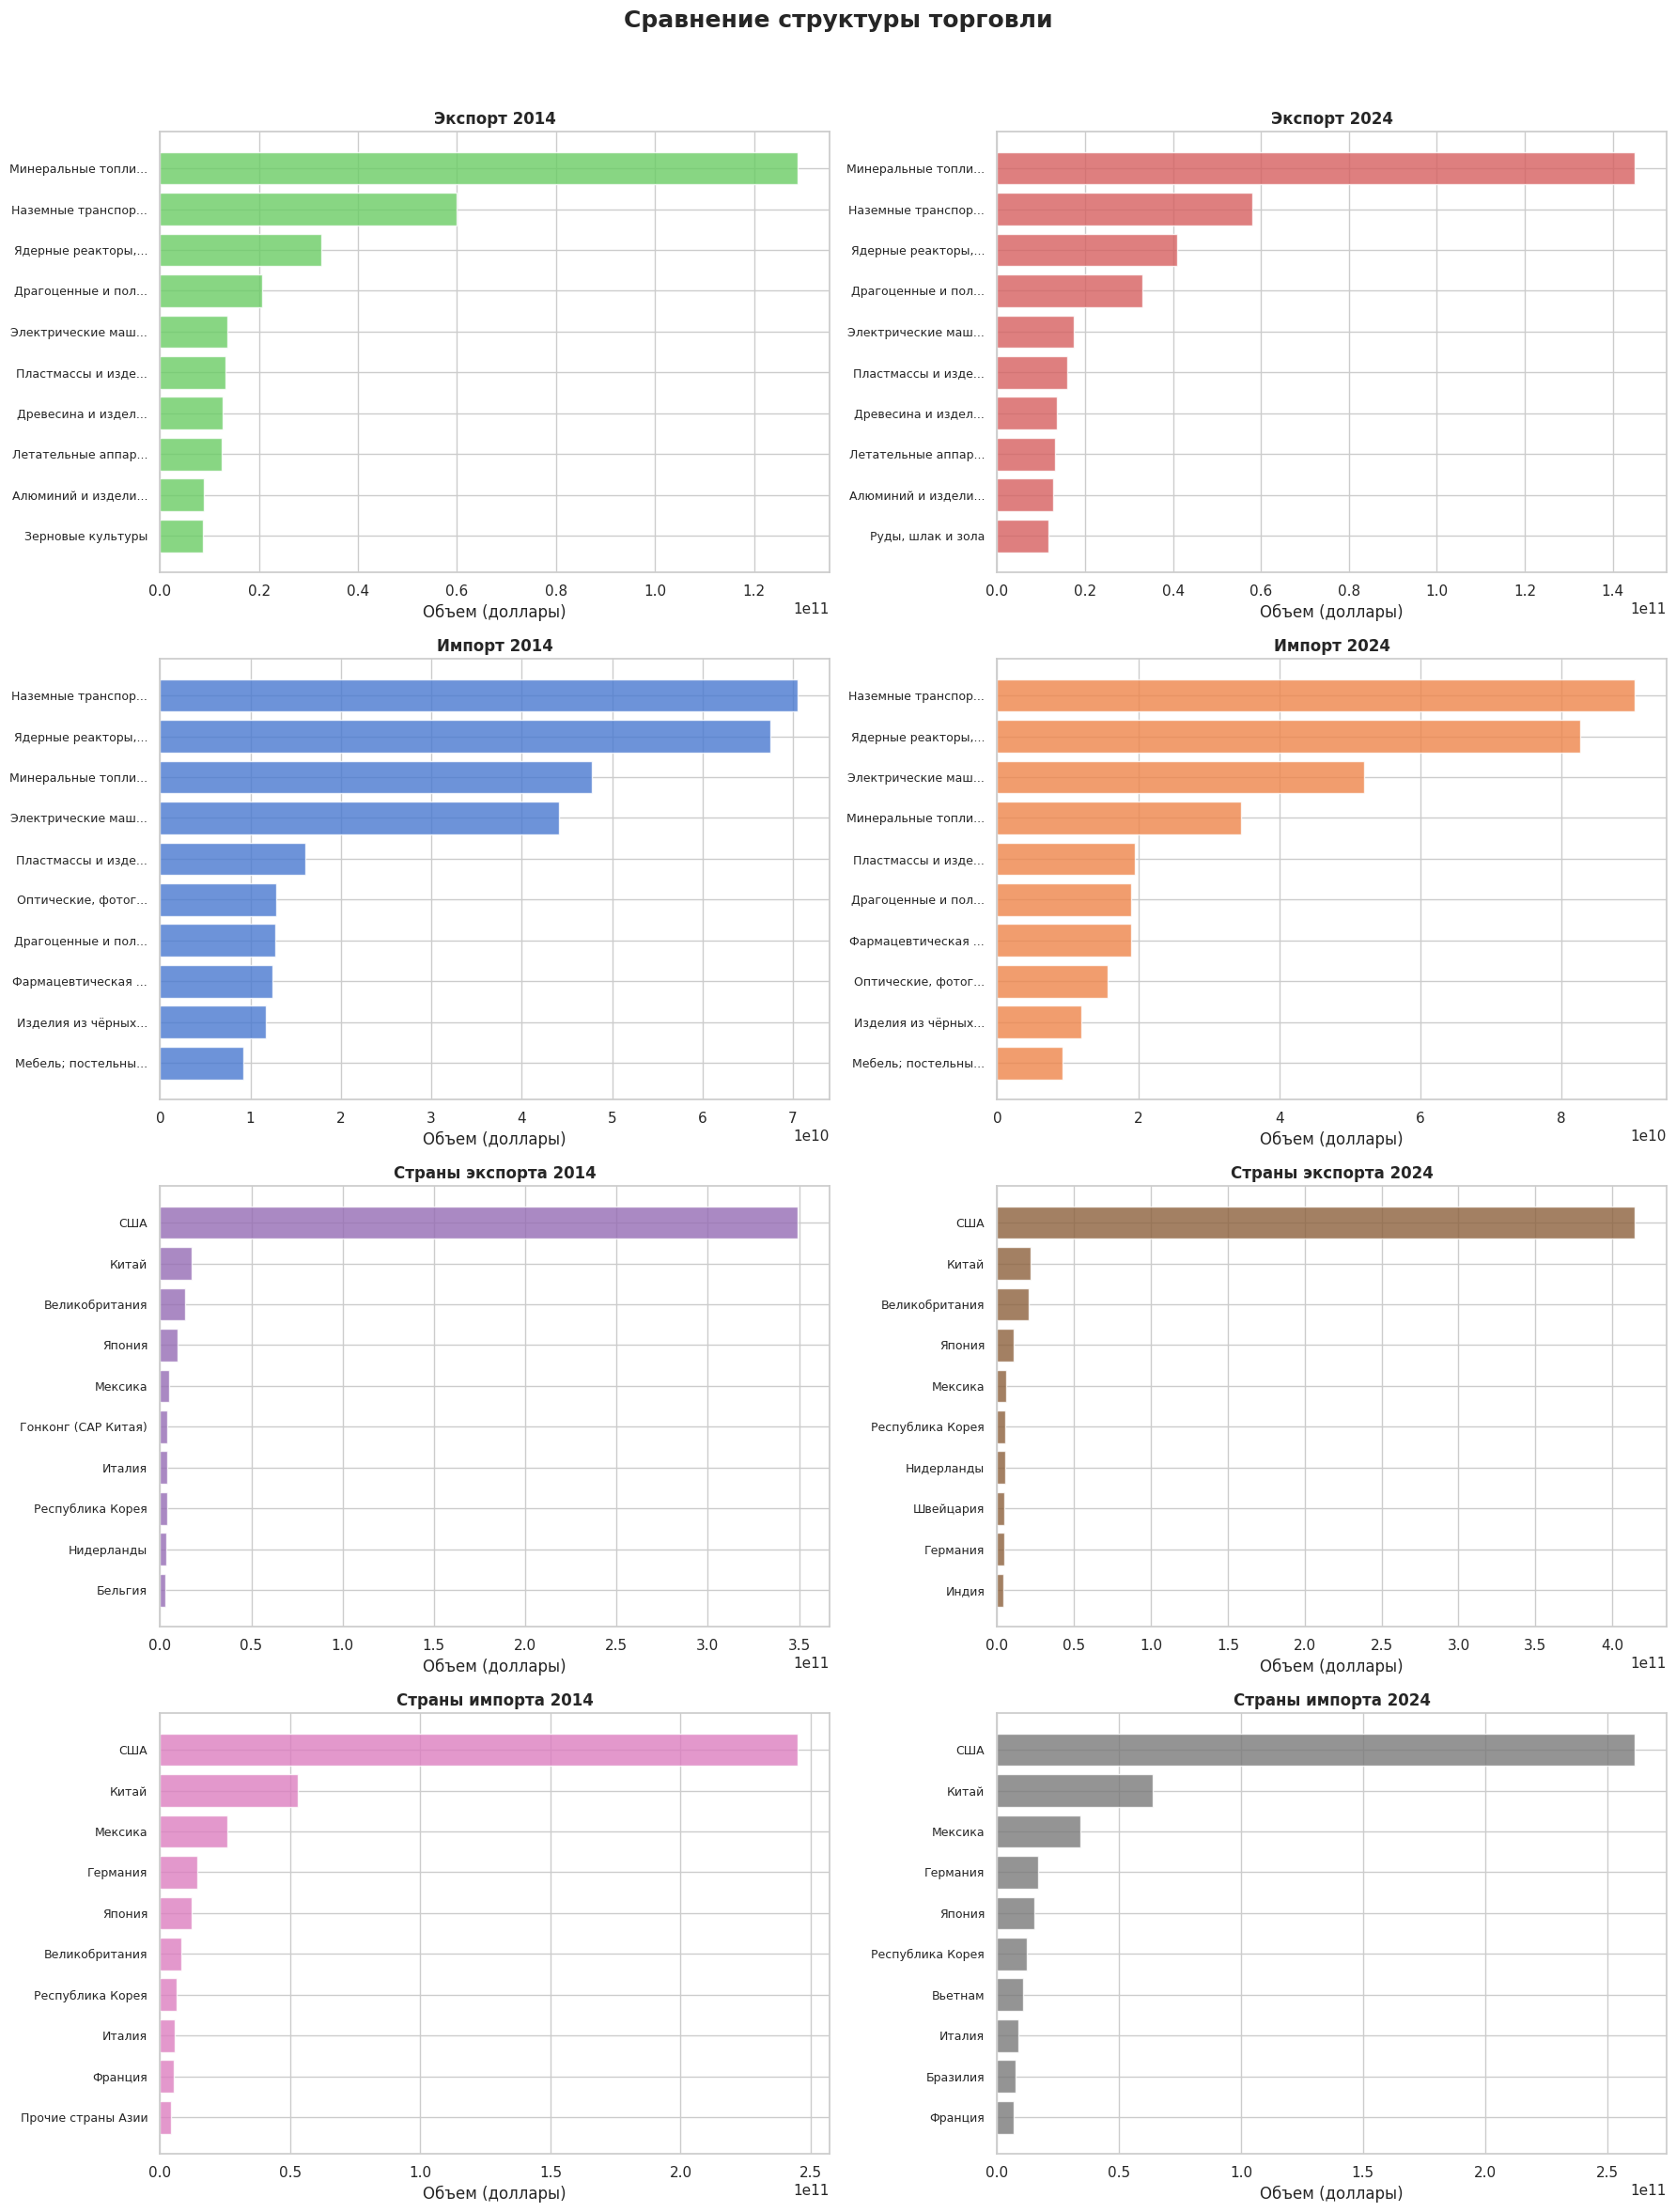


Изменения в топ-10 товаров по экспорту:
  Добавлены: ['Руды, шлак и зола']
  Ушли: ['Зерновые культуры']

Изменения в топ-10 товаров по импорту:
  Добавлены: Нет
  Ушли: Нет

Изменения в топ-10 стран по экспорту:
  Добавлены: ['Германия', 'Индия', 'Швейцария']
  Ушли: ['Бельгия', 'Гонконг (САР Китая)', 'Италия']

Изменения в топ-10 стран по импорту:
  Добавлены: ['Бразилия', 'Вьетнам']
  Ушли: ['Великобритания', 'Прочие страны Азии']

=== Общие показатели ===
Экспорт:
  2014: 458,183,072,111 $
  2024: 546,797,286,380 $
  Изменение: +19.3%

Импорт:
  2014: 454,400,079,563 $
  2024: 539,031,109,486 $
  Изменение: +18.6%

Торговое сальдо:
  2014: 3,782,992,548 $
  2024: 7,766,176,895 $
  Изменение: +3,983,184,346.6120605 $


In [128]:
print("=== ИЗМЕНЕНИЕ СТРУКТУРЫ ТОРГОВЛИ ЗА ПОСЛЕДНИЕ 10 ЛЕТ ===")

# Определяем годы для сравнения
max_year = full_trade_data['period'].max()
min_year = max_year - 10

print(f"Сравниваем {min_year} и {max_year} годы")

# Фильтрация данных по годам
data_min = full_trade_data[full_trade_data['period'] == min_year]
data_max = full_trade_data[full_trade_data['period'] == max_year]

print(f"Записей за {min_year}: {len(data_min)}")
print(f"Записей за {max_year}: {len(data_max)}")

def get_top_10(data, flow, group_col):
    return (data[data['flowCode'] == flow]
            .groupby(group_col)['primaryValue']
            .sum()
            .sort_values(ascending=False)
            .head(10))

# Получаем топ-10 по товарам и странам
export_min_goods = get_top_10(data_min, 'X', 'commodity_name')
export_max_goods = get_top_10(data_max, 'X', 'commodity_name')
import_min_goods = get_top_10(data_min, 'M', 'commodity_name')
import_max_goods = get_top_10(data_max, 'M', 'commodity_name')

export_min_countries = get_top_10(data_min, 'X', 'partner_name')
export_max_countries = get_top_10(data_max, 'X', 'partner_name')
import_min_countries = get_top_10(data_min, 'M', 'partner_name')
import_max_countries = get_top_10(data_max, 'M', 'partner_name')

# Функция вывода топ-10
def print_top_10(title, series):
    print(f"\n{title}:")
    display(series.reset_index())

print_top_10(f"Топ-10 товаров по экспорту в {min_year} году", export_min_goods)
print_top_10(f"Топ-10 товаров по экспорту в {max_year} году", export_max_goods)
print_top_10(f"Топ-10 товаров по импорту в {min_year} году", import_min_goods)
print_top_10(f"Топ-10 товаров по импорту в {max_year} году", import_max_goods)

print_top_10(f"Топ-10 стран по экспорту в {min_year} году", export_min_countries)
print_top_10(f"Топ-10 стран по экспорту в {max_year} году", export_max_countries)
print_top_10(f"Топ-10 стран по импорту в {min_year} году", import_min_countries)
print_top_10(f"Топ-10 стран по импорту в {max_year} году", import_max_countries)

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
palette = sns.color_palette("muted")

fig, axes = plt.subplots(4, 2, figsize=(18, 24))
fig.suptitle('Сравнение структуры торговли', fontsize=18, fontweight='bold')

def plot_barh(ax, data, title, color):
    labels = [name if len(name) <= 20 else name[:17] + '...' for name in data.index]
    ax.barh(range(len(data)), data.values, color=color, alpha=0.8)
    ax.set_yticks(range(len(data)))
    ax.set_yticklabels(labels, fontsize=9)
    ax.invert_yaxis()
    ax.set_title(title, fontsize=12, fontweight='bold')

plot_barh(axes[0,0], export_min_goods, f'Экспорт {min_year}', palette[2])
plot_barh(axes[0,1], export_max_goods, f'Экспорт {max_year}', palette[3])

plot_barh(axes[1,0], import_min_goods, f'Импорт {min_year}', palette[0])
plot_barh(axes[1,1], import_max_goods, f'Импорт {max_year}', palette[1])

plot_barh(axes[2,0], export_min_countries, f'Страны экспорта {min_year}', palette[4])
plot_barh(axes[2,1], export_max_countries, f'Страны экспорта {max_year}', palette[5])

plot_barh(axes[3,0], import_min_countries, f'Страны импорта {min_year}', palette[6])
plot_barh(axes[3,1], import_max_countries, f'Страны импорта {max_year}', palette[7])

for ax in axes.flatten():
    ax.set_xlabel('Объем (доллары)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Анализ изменений
def compare_top_10(old, new, entity_name):
    added = set(new.index) - set(old.index)
    removed = set(old.index) - set(new.index)
    print(f"\nИзменения в топ-10 {entity_name}:")
    print(f"  Добавлены: {sorted(added) if added else 'Нет'}")
    print(f"  Ушли: {sorted(removed) if removed else 'Нет'}")

compare_top_10(export_min_goods, export_max_goods, "товаров по экспорту")
compare_top_10(import_min_goods, import_max_goods, "товаров по импорту")
compare_top_10(export_min_countries, export_max_countries, "стран по экспорту")
compare_top_10(import_min_countries, import_max_countries, "стран по импорту")

# Общая статистика
def safe_pct_change(old, new):
    if old == 0:
        return float('inf') if new != 0 else 0
    return (new - old) / old * 100

total_export_min = data_min[data_min['flowCode'] == 'X']['primaryValue'].sum()
total_export_max = data_max[data_max['flowCode'] == 'X']['primaryValue'].sum()
total_import_min = data_min[data_min['flowCode'] == 'M']['primaryValue'].sum()
total_import_max = data_max[data_max['flowCode'] == 'M']['primaryValue'].sum()

print(f"\n=== Общие показатели ===")
print(f"Экспорт:")
print(f"  {min_year}: {total_export_min:,.0f} $")
print(f"  {max_year}: {total_export_max:,.0f} $")
print(f"  Изменение: {safe_pct_change(total_export_min, total_export_max):+.1f}%")

print(f"\nИмпорт:")
print(f"  {min_year}: {total_import_min:,.0f} $")
print(f"  {max_year}: {total_import_max:,.0f} $")
print(f"  Изменение: {safe_pct_change(total_import_min, total_import_max):+.1f}%")

balance_min = total_export_min - total_import_min
balance_max = total_export_max - total_import_max
print(f"\nТорговое сальдо:")
print(f"  {min_year}: {balance_min:,.0f} $")
print(f"  {max_year}: {balance_max:,.0f} $")
print(f"  Изменение: {(balance_max - balance_min):+,} $")
